## PROJECT 7: DEEP NEURAL NETWORKS - Bank Churn Prediction - Sai K (04/30/2023)

## Description

### Background and Context

Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

**Objective**

Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

**Data Description**

The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.

**Data Dictionary**

* CustomerId: Unique ID which is assigned to each customer
* Surname: Last name of the customer 
* CreditScore: It defines the credit history of the customer.  
* Geography: A customer’s location    
* Gender: It defines the Gender of the customer   
* Age: Age of the customer     
* Tenure: Number of years for which the customer has been with the bank
* NumOfProducts: It refers to the number of products that a customer has purchased through the bank.
* Balance: Account balance
* HasCrCard: It is a categorical variable that decides whether the customer has a credit card or not.
* EstimatedSalary: Estimated salary 
* isActiveMember: It is a categorical variable that decides whether the customer is an active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions, etc )
* Exited: It is a categorical variable that decides whether the customer left the bank within six months or not. It can take two values
    * 0=No ( Customer did not leave the bank )
    * 1=Yes ( Customer left the bank )

### Loading Libraries

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# libaries to help with data visualization
import matplotlib.pyplot as pyplot
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# library to import to standardize the data
from sklearn.preprocessing import StandardScaler

# Library to encode the variables
from sklearn import preprocessing

#To import different metrics 
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score, mean_absolute_error

#Importing classback API
from keras import callbacks

# Importing tensorflow library
import tensorflow as tf

# importing different functions to build models
from tensorflow.keras.layers import Dense, Dropout,InputLayer
from tensorflow.keras.models import Sequential

# Importing Batch Normalization
from keras.layers import BatchNormalization

# Importing backend
from tensorflow.keras import backend

# Importing shffule 
from random import shuffle
from keras.callbacks import ModelCheckpoint

# Importing optimizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop

from sklearn.decomposition import PCA
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

### Reading the dataset

In [2]:
# loading the dataset
data = pd.read_csv("C:/Users/OneDrive/Desktop/Python/8_introduction_to_neural_networks/project/Churn.csv")

### Overview of the dataset

**view the first (5), last (5) and (10) random rows of the dataset**

In [3]:
# viewing the first 5 rows of the data
data.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [4]:
data.tail()

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0

In [5]:
np.random.seed(1)
data.sample(n=10)

RowNumber  CustomerId         Surname  CreditScore Geography  Gender  \
9953       9954    15655952           Burke          550    France    Male   
3850       3851    15775293      Stephenson          680    France    Male   
4962       4963    15665088          Gordon          531    France  Female   
3886       3887    15720941            Tien          710   Germany    Male   
5437       5438    15733476        Gonzalez          543   Germany    Male   
8517       8518    15671800        Robinson          688    France    Male   
2041       2042    15709846             Yeh          840    France  Female   
1989       1990    15622454         Zaitsev          695     Spain    Male   
1933       1934    15815560           Bogle          666   Germany    Male   
9984       9985    15696175  Echezonachukwu          602   Germany    Male   

      Age  Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
9953   47       2       0.00              2          1               1   
3850   34       3  143292.95              1          1               0   
4962   42       2       0.00              2          0               1   
3886   34       8  147833.30              2          0               1   
5437   30       6   73481.05              1          1               1   
8517   20       8  137624.40              2          1               1   
2041   39       1   94968.97              1          1               0   
1989   28       0   96020.86              1          1               1   
1933   74       7  105102.50              1          1               1   
9984   35       7   90602.42              2          1               1   

      EstimatedSalary  Exited  
9953         97057.28       0  
3850         66526.01       0  
4962         90537.47       0  
3886          1561.58       0  
5437        176692.65       0  
8517        197582.79       0  
2041         84487.62       0  
1989         57992.49       0  
1933         46172.47       0  
9984         51695.41       0

In [6]:
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns in the data set.")

There are 10000 rows and 14 columns in the data set.


**Missing Values**

In [7]:
data.isnull().sum().sort_values(ascending=False)

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
# let's check for missing values in the data
round(data.isnull().sum() / data.isnull().count() * 100, 2)

RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

* There are no missing values in the dataset

**Duplicated Values**

In [9]:
data.duplicated().sum()

0

In [10]:
data[data.duplicated()].count()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

* No duplicated rows in the dataset. There are 10,000 rows

In [11]:
# checking the number of unique values in each column
data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [12]:
for col in data.columns:
    print(data[col].value_counts(ascending = False))
    print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")
    

1        1
6671     1
6664     1
6665     1
6666     1
        ..
3334     1
3335     1
3336     1
3337     1
10000    1
Name: RowNumber, Length: 10000, dtype: int64
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
15634602    1
15667932    1
15766185    1
15667632    1
15599024    1
           ..
15599078    1
15702300    1
15660735    1
15671390    1
15628319    1
Name: CustomerId, Length: 10000, dtype: int64
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: Surname, Length: 2932, dtype: int64
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: CreditScore, Length: 460, dtype: int64
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
France     5014
Germany    25

In [13]:
for col in data.columns:
    print(data[col].value_counts(normalize = True, ascending = False)*100)
    print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")

1        0.01
6671     0.01
6664     0.01
6665     0.01
6666     0.01
         ... 
3334     0.01
3335     0.01
3336     0.01
3337     0.01
10000    0.01
Name: RowNumber, Length: 10000, dtype: float64
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
15634602    0.01
15667932    0.01
15766185    0.01
15667632    0.01
15599024    0.01
            ... 
15599078    0.01
15702300    0.01
15660735    0.01
15671390    0.01
15628319    0.01
Name: CustomerId, Length: 10000, dtype: float64
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Smith       0.32
Scott       0.29
Martin      0.29
Walker      0.28
Brown       0.26
            ... 
Izmailov    0.01
Bold        0.01
Bonham      0.01
Poninski    0.01
Burbidge    0.01
Name: Surname, Length: 2932, dtype: float64
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
850    2.33
678    0.63
655    0.54
705    0.53
667    0.53
       ... 
404    0.01
351    0.01
365    0.01
417    0.01
419    0.01
Name: Credit

*Intersteingly 'Smith' is the most common surname in the dataset, followed by Scott.
* Looks this data belongs to bank customers from (3) Euro contries France, Germany and Spain. 54% of the customers belongs to France
* 70.55% has Credit cards
* 51.51 % Customers are active users
* 54.57% are male users
* 20.37% has exited the bank

In [14]:
(data[data['Exited'] == 1].shape[0] / (data.shape[0])) * 100

20.369999999999997

* From the dataset 20.37% of the cutsomers has exited the bank. 

In [15]:
# checking datatypes and number of non-null values for each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [16]:
# Let's look at the statistical summary of the data
data.describe().T

count          mean           std          min  \
RowNumber        10000.0  5.000500e+03   2886.895680         1.00   
CustomerId       10000.0  1.569094e+07  71936.186123  15565701.00   
CreditScore      10000.0  6.505288e+02     96.653299       350.00   
Age              10000.0  3.892180e+01     10.487806        18.00   
Tenure           10000.0  5.012800e+00      2.892174         0.00   
Balance          10000.0  7.648589e+04  62397.405202         0.00   
NumOfProducts    10000.0  1.530200e+00      0.581654         1.00   
HasCrCard        10000.0  7.055000e-01      0.455840         0.00   
IsActiveMember   10000.0  5.151000e-01      0.499797         0.00   
EstimatedSalary  10000.0  1.000902e+05  57510.492818        11.58   
Exited           10000.0  2.037000e-01      0.402769         0.00   

                         25%           50%           75%          max  
RowNumber            2500.75  5.000500e+03  7.500250e+03     10000.00  
CustomerId       15628528.25  1.569074e+07  1.575323e+07  15815690.00  
CreditScore           584.00  6.520000e+02  7.180000e+02       850.00  
Age                    32.00  3.700000e+01  4.400000e+01        92.00  
Tenure                  3.00  5.000000e+00  7.000000e+00        10.00  
Balance                 0.00  9.719854e+04  1.276442e+05    250898.09  
NumOfProducts           1.00  1.000000e+00  2.000000e+00         4.00  
HasCrCard               0.00  1.000000e+00  1.000000e+00         1.00  
IsActiveMember          0.00  1.000000e+00  1.000000e+00         1.00  
EstimatedSalary     51002.11  1.001939e+05  1.493882e+05    199992.48  
Exited                  0.00  0.000000e+00  0.000000e+00         1.00

In [17]:
# Dropping RowNumber and CustomerId columns as these independent varibales don't mathematically influence the target variables
data.drop(["RowNumber", "CustomerId"], axis=1, inplace=True)

**Inferences**

* The mean value of RowNumber is 5000.5, which is the median value too. This suggests that the data is evenly distributed across the rows.

* The mean customer ID is 15,690,940 and the standard deviation is 71,936. This indicates that the customers' IDs are relatively close to each other, and there are no significant outliers in the data.

* The mean credit score is 650.53, with a standard deviation of 96.65. This indicates that the credit scores of the customers are relatively normally distributed with a slight right skewness.

* The mean age of the customers is 38.92, with a standard deviation of 10.49. The minimum age is 18, and the maximum age is 92, indicating that the data set includes a broad age range of customers.

* The mean tenure is 5.01 years, with a standard deviation of 2.89. The minimum tenure is 0 years, indicating that some customers are new, and the maximum tenure is 10 years, indicating that some customers are long-term.

* The mean balance is 76,485.89, with a standard deviation of 62,397.41. The minimum balance is 0, indicating that some customers have no balance, and the maximum balance is 250,898.09, indicating that some customers have a substantial balance.

* The mean number of products per customer is 1.53, with a standard deviation of 0.58. The minimum number of products is 1, and the maximum number of products is 4, indicating that most customers have one product, while some have multiple products.

* The mean proportion of customers having a credit card is 0.71, indicating that the majority of customers have a credit card.

* The mean proportion of active customers is 0.52, indicating that about half of the customers are active.

* The mean estimated salary is 100,090.2, with a standard deviation of 57,510.49. The minimum estimated salary is 11.58, indicating that some customers have a very low income, and the maximum estimated salary is 199,992.48, indicating that some customers have a very high income.

* The mean proportion of customers who have exited the bank is 0.2037, indicating that around 20% of the customers have exited the bank.

## Exploratory Data Analysis (EDA)

**Functions to carry out the Exploratory Data Analysis**

In [18]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [19]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

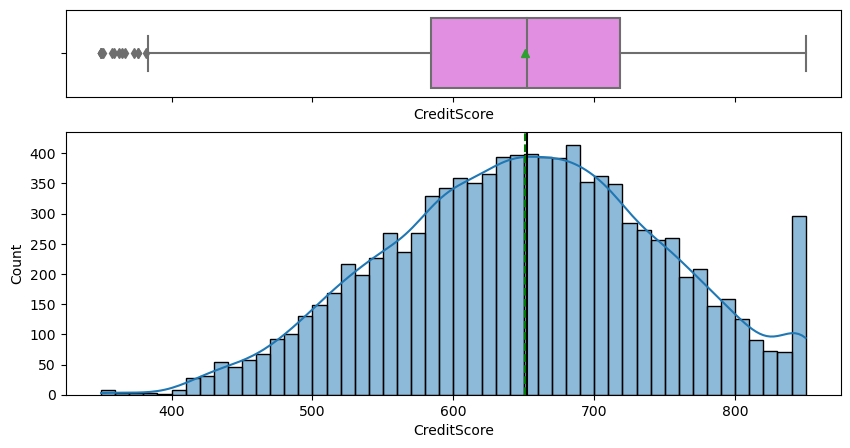

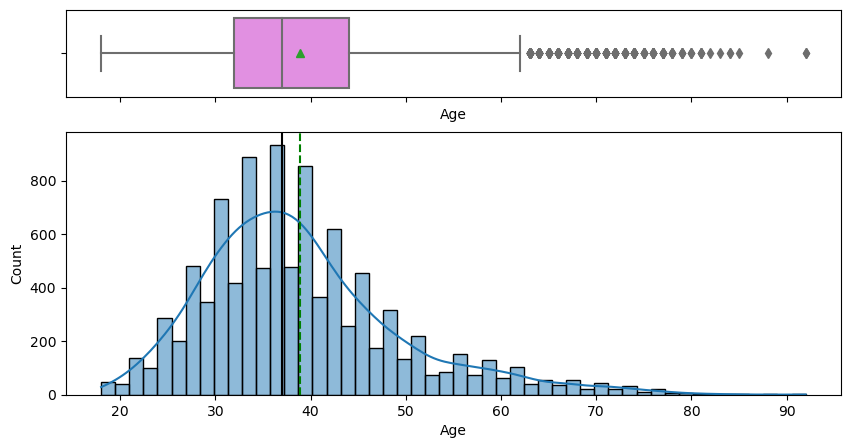

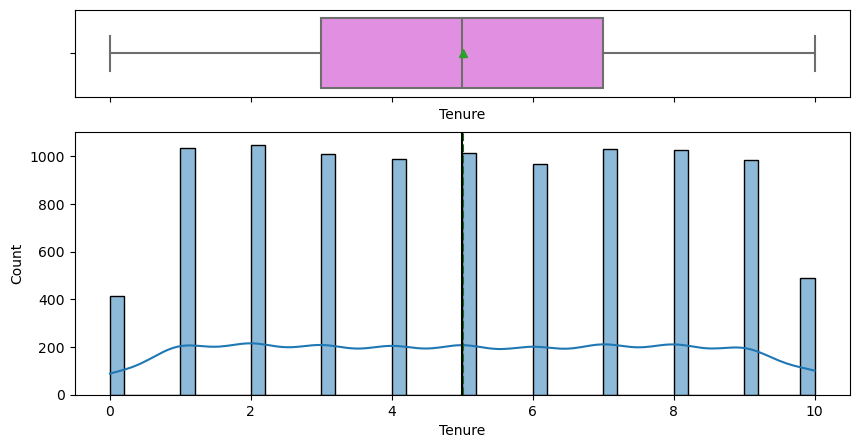

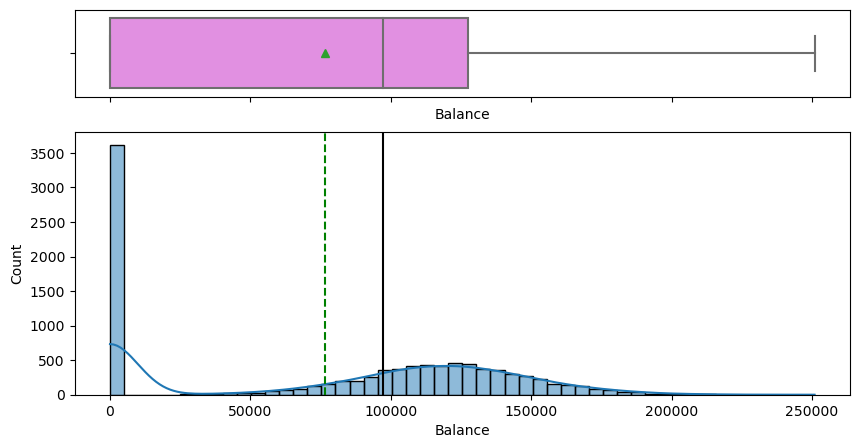

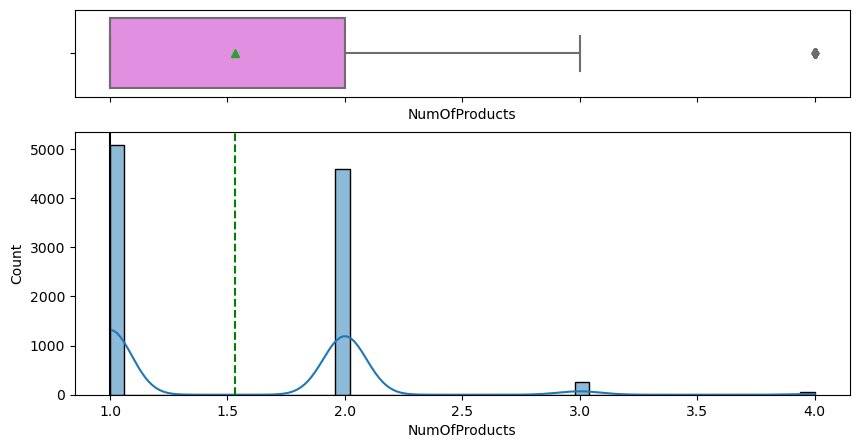

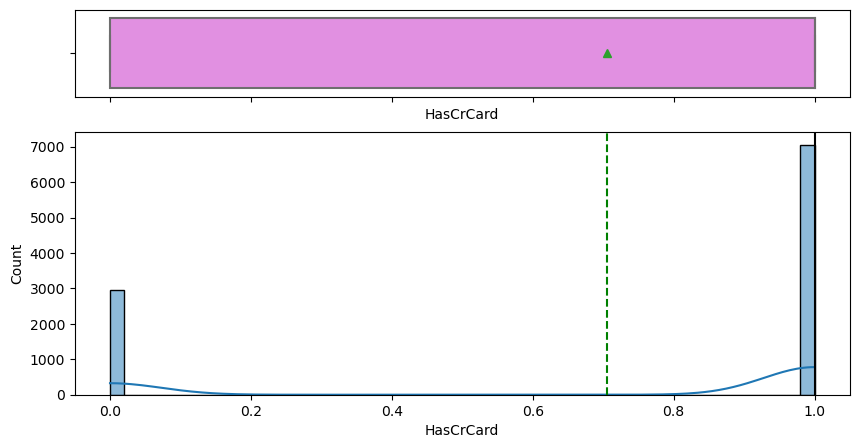

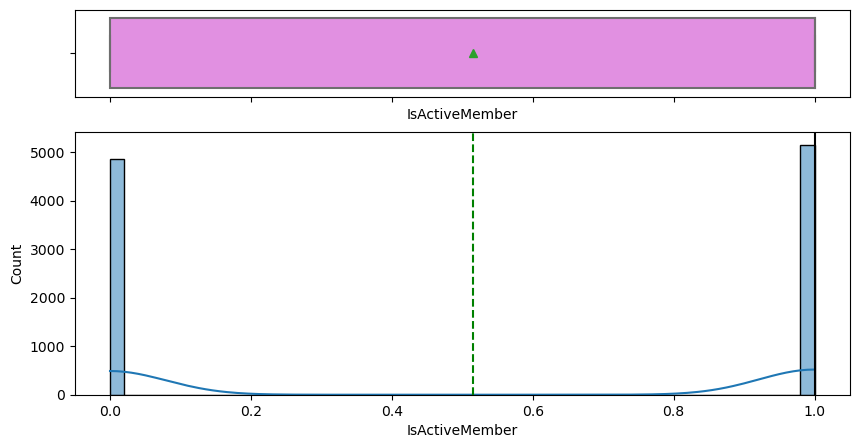

In [20]:
# selecting numerical columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()

for item in num_cols:
    histogram_boxplot(data, item, bins=50, kde=True, figsize=(10, 5))

### Univariate Analysis

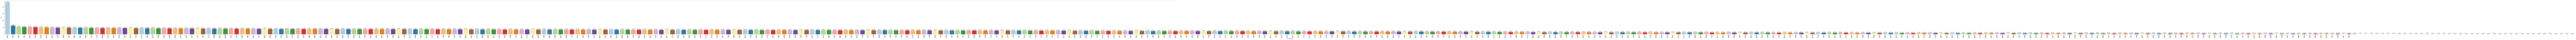

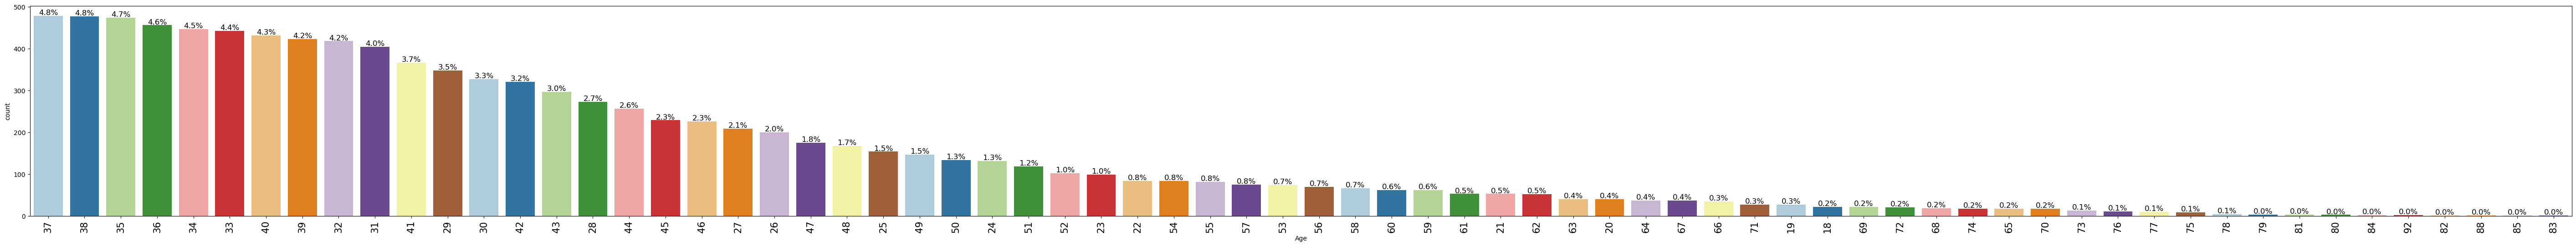

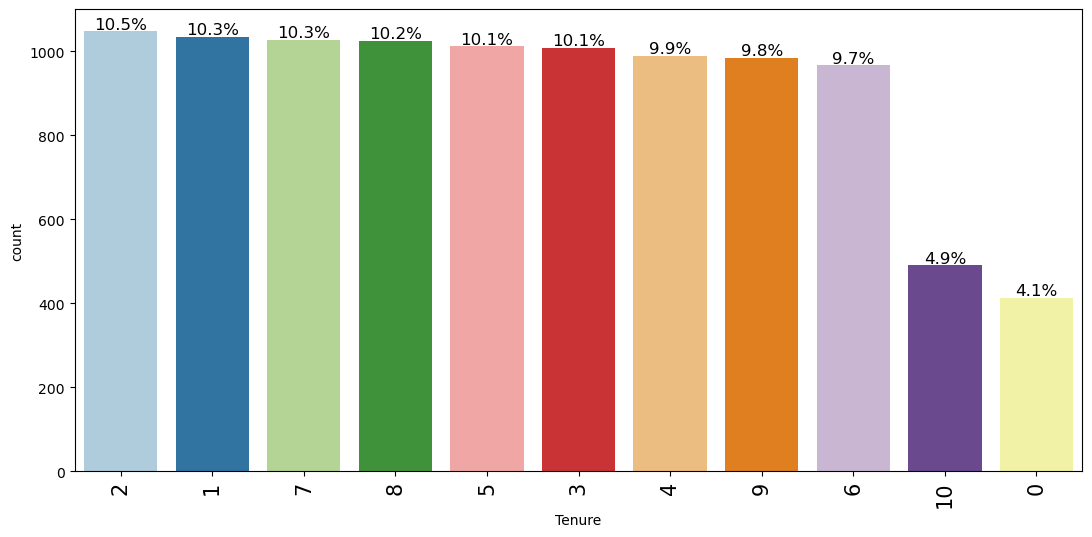

ValueError: Image size of 638400x600 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 638400x600 with 1 Axes>

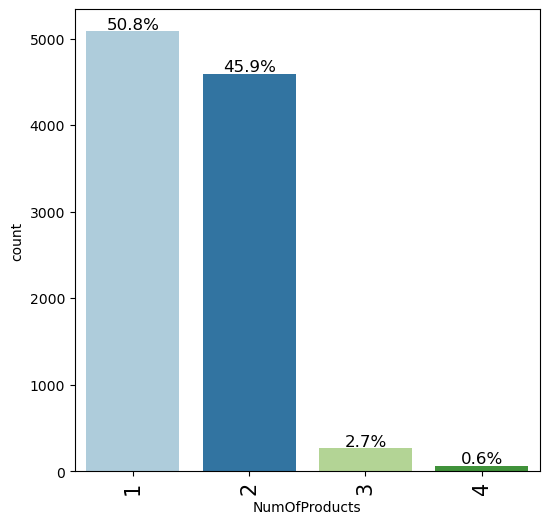

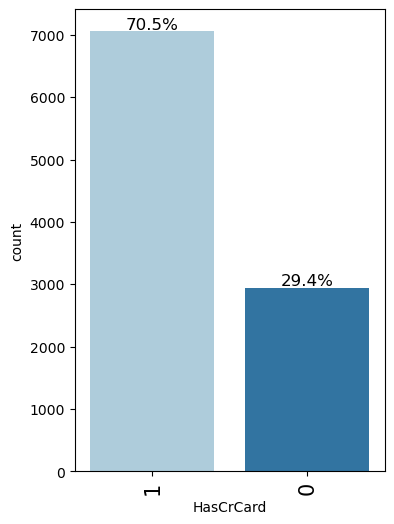

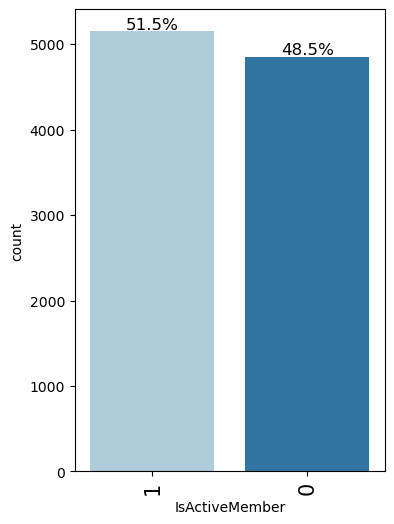

ValueError: Image size of 1000100x600 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1.0001e+06x600 with 1 Axes>

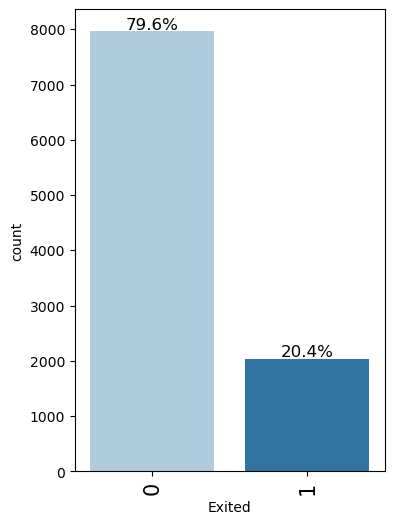

In [21]:
# selecting numerical columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()

for item in num_cols:
    labeled_barplot(data, item, perc=True)

In [22]:
#visual representation of instances per Exited
data.Exited.value_counts().plot.bar()

<AxesSubplot:>

0    7963
1    2037
Name: Exited, dtype: int64


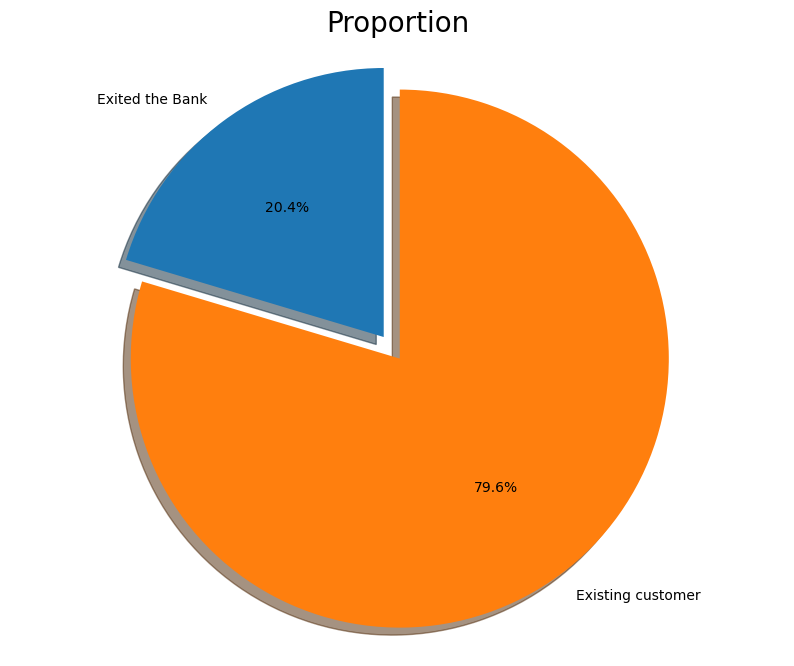

In [23]:
print(data.Exited.value_counts())
labels = 'Exited the Bank', 'Existing customer'
#sizes = [ds.is_promoted[ds['is_promoted']==1].count(), ds.is_promoted[ds['is_promoted']==0].count()]
sizes = [data.Exited[data['Exited']==1].count(),data.Exited[data['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion", size = 20)
plt.show()

## Bivariate Analysis

In [24]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [25]:
### Function to plot distributions


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

**Credit Score vs Exited**

In [26]:
stacked_barplot(data, "CreditScore", "Exited")

Exited          0     1    All
CreditScore                   
All          7963  2037  10000
850           190    43    233
651            33    17     50
705            37    16     53
637            32    14     46
...           ...   ...    ...
810             6     0      6
442             1     0      1
488            10     0     10
814            11     0     11
472             8     0      8

[461 rows x 3 columns]
------------------------------------------------------------------------------------------------------------------------


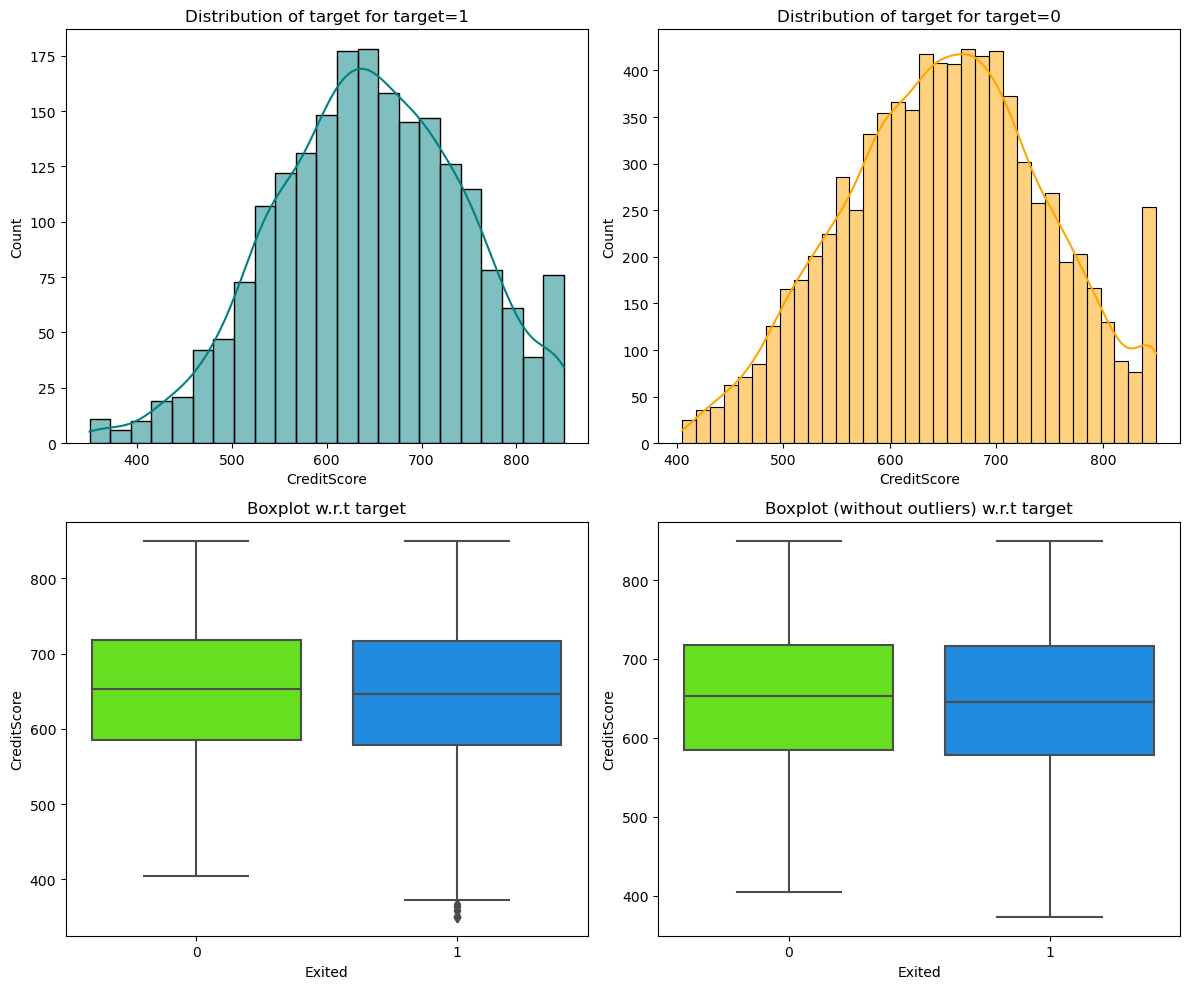

In [27]:
distribution_plot_wrt_target(data, "CreditScore", "Exited")

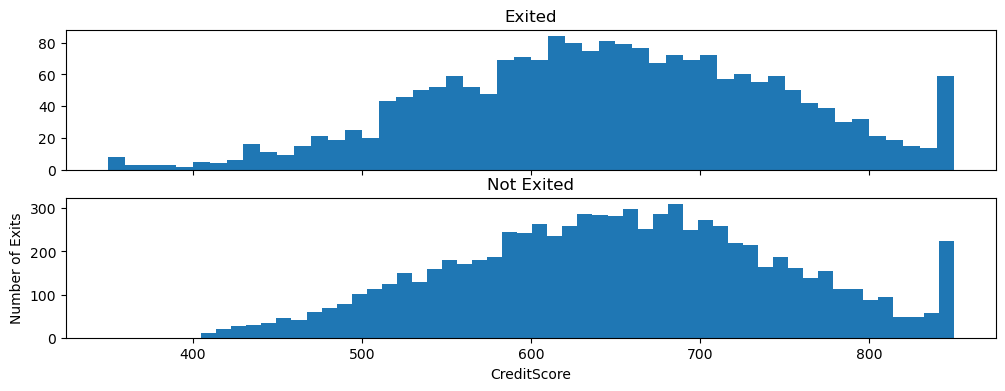

In [28]:
#Histrogram for feature Time
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

ax1.hist(data["CreditScore"][data["Exited"] == 1], bins = 50)
ax1.set_title('Exited')

ax2.hist(data["CreditScore"][data["Exited"] == 0], bins = 50)
ax2.set_title('Not Exited')

plt.xlabel('CreditScore')
plt.ylabel('Number of Exits')
plt.show()

**Geography vs Exited**

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


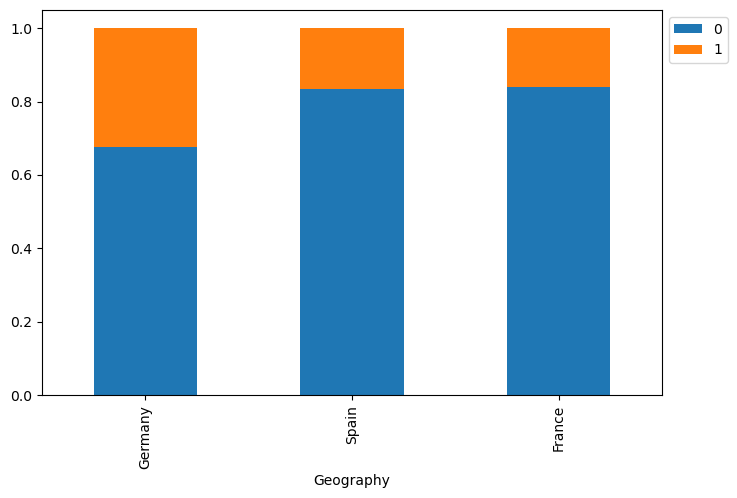

In [29]:
stacked_barplot(data, "Geography", "Exited")

* The majority of customers in the dataset are from France (5014), followed by Spain (2477) and Germany (2509).
* The proportion of customers who have exited the bank is highest in Germany (814/2509 = 32.47%), followed by France (810/5014 = 16.14%) and Spain (413/2477 = 16.67%).
* The proportion of customers who have exited the bank is highest in Germany (814/2509 = 32.47%), which is significantly higher than the overall exit rate (20.37%).
* The highest number of customers who have exited the bank are from France (810).
* Out of the total number of customers who have exited the bank, the proportion of customers from Germany is higher (814/2037 = 39.92%) than that of France (810/2037 = 39.74%) and Spain (413/2037 = 20.33%).

**Gender vs Exited** 

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


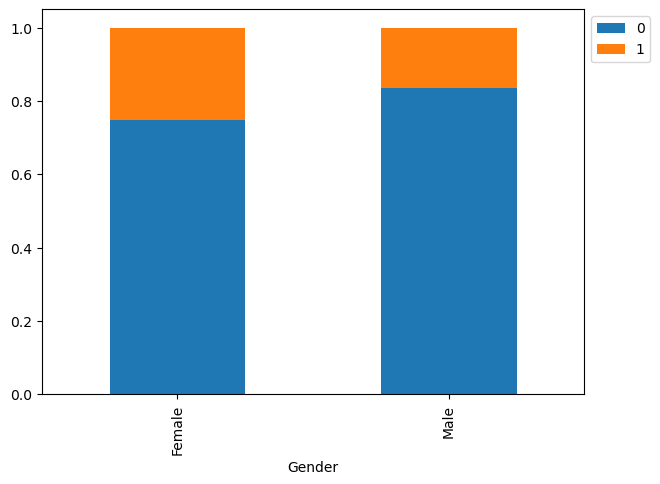

In [30]:
stacked_barplot(data, "Gender", "Exited")

* The percentage of female customers who have exited the bank (1139/4543 = 25.07%) is higher than that of male customers (898/5457 = 16.45%).
* The highest number of customers who have exited the bank are males (4559).
* Out of the total number of females, 1139 (25.07%) have exited the bank, which is higher than the proportion of males who have exited (898/5457 = 16.45%).
* Out of the total number of customers who have exited the bank, the proportion of females is less than that of males (1139/2037 = 55.86% and 898/2037 = 44.14%, respectively).

**Age vs Exited**

Exited     0     1    All
Age                      
All     7963  2037  10000
46       135    91    226
40       343    89    432
43       209    88    297
45       142    87    229
..       ...   ...    ...
79         4     0      4
78         5     0      5
77        10     0     10
76        11     0     11
75         9     0      9

[71 rows x 3 columns]
------------------------------------------------------------------------------------------------------------------------


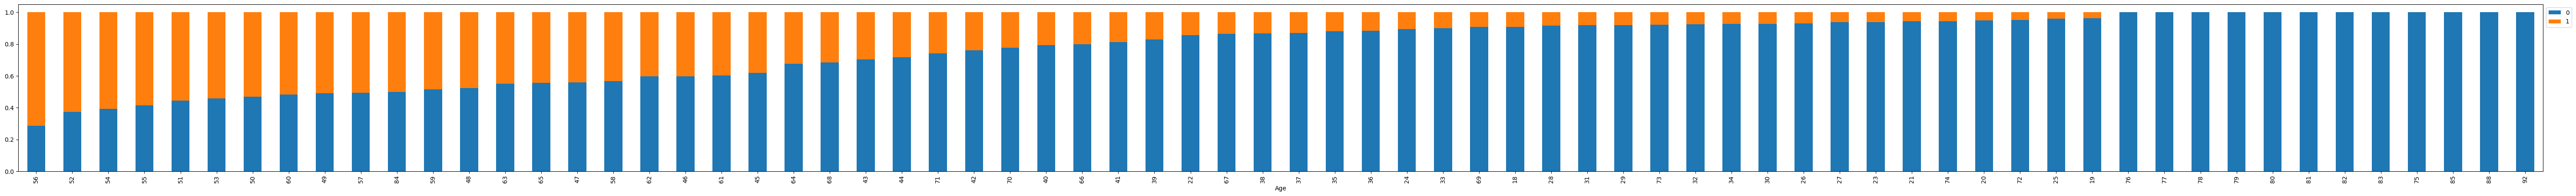

In [31]:
stacked_barplot(data, "Age", "Exited")

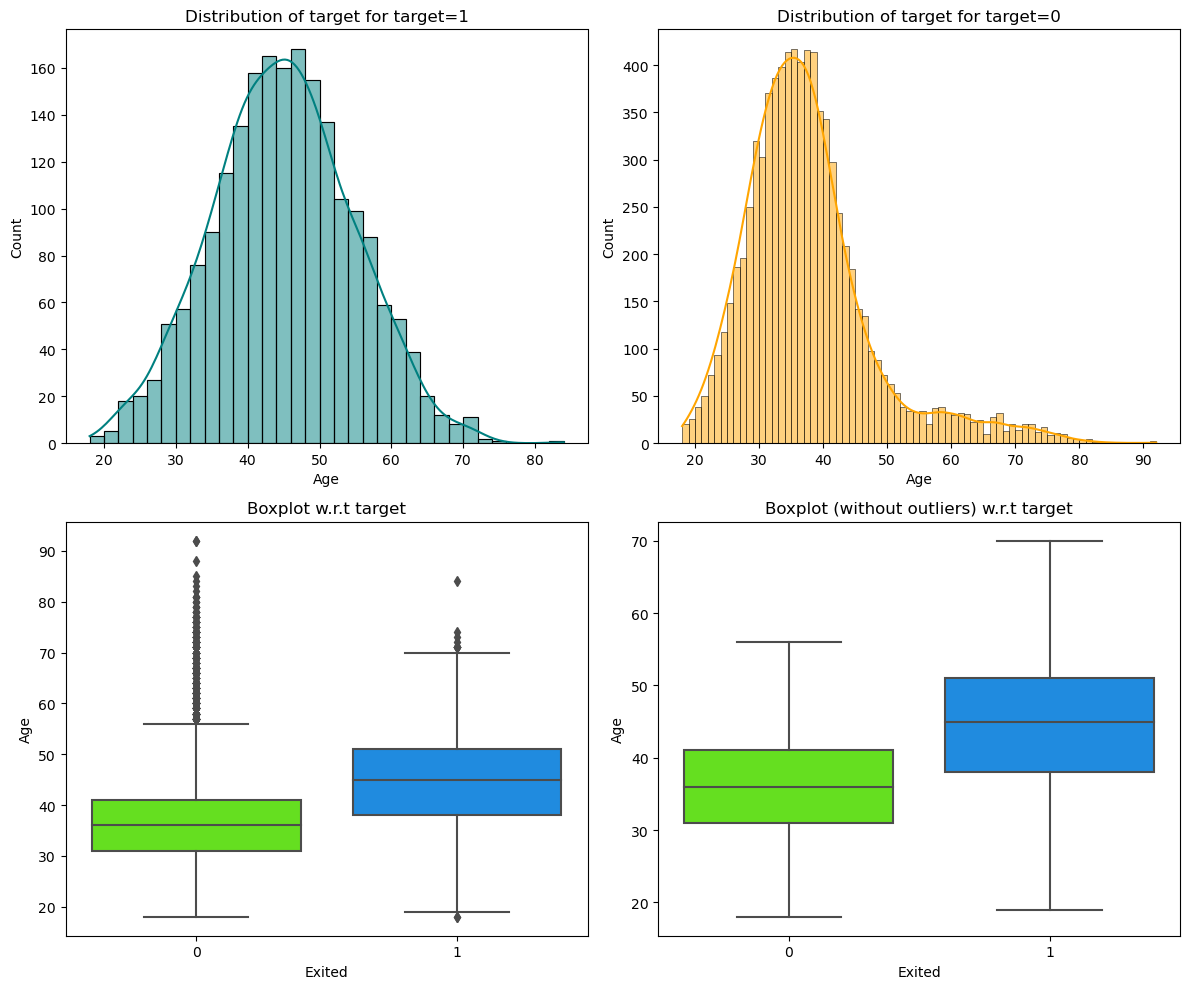

In [32]:
distribution_plot_wrt_target(data, "Age", "Exited")

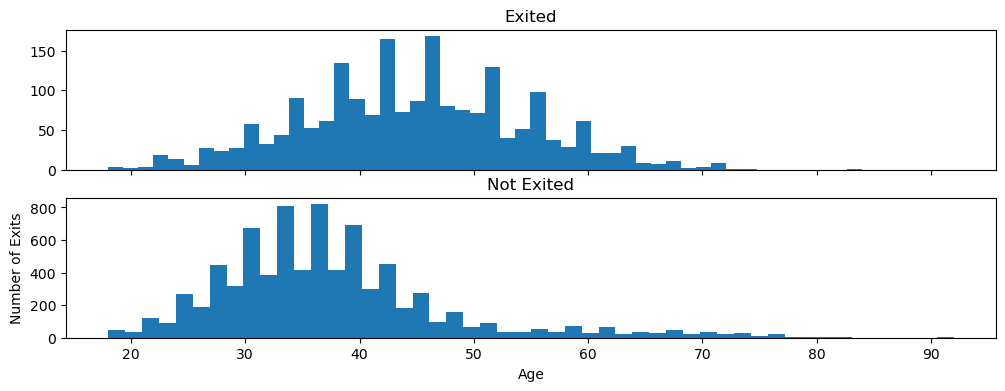

In [33]:
#Histrogram for feature Time
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

ax1.hist(data["Age"][data["Exited"] == 1], bins = 50)
ax1.set_title('Exited')

ax2.hist(data["Age"][data["Exited"] == 0], bins = 50)
ax2.set_title('Not Exited')

plt.xlabel('Age')
plt.ylabel('Number of Exits')
plt.show()

**Tenure vs Exited**

Exited     0     1    All
Tenure                   
All     7963  2037  10000
1        803   232   1035
3        796   213   1009
9        771   213    984
5        803   209   1012
4        786   203    989
2        847   201   1048
8        828   197   1025
6        771   196    967
7        851   177   1028
10       389   101    490
0        318    95    413
------------------------------------------------------------------------------------------------------------------------


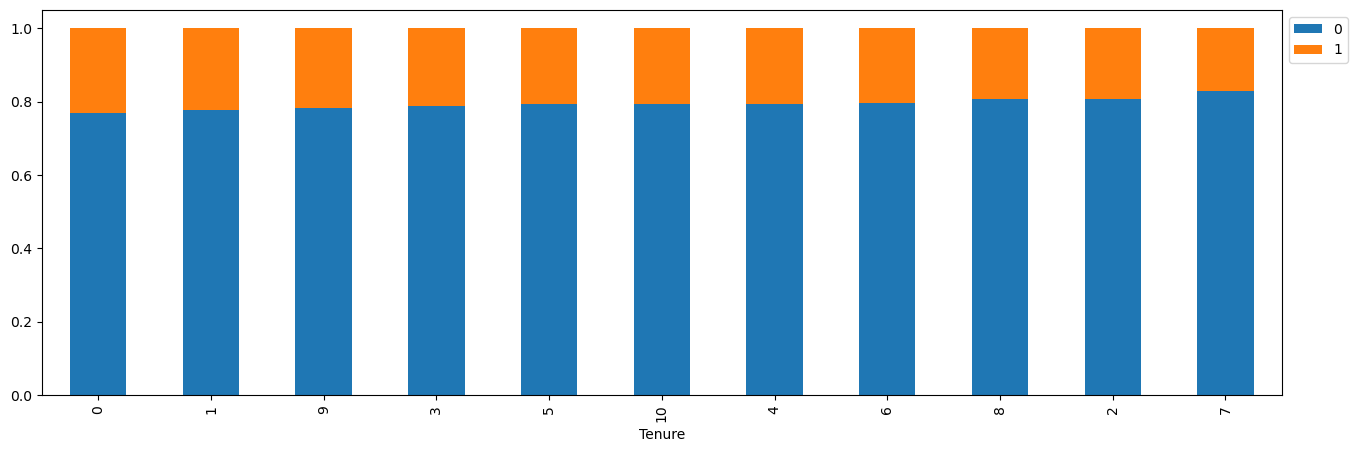

In [34]:
stacked_barplot(data, "Tenure", "Exited")

In [35]:
distribution_plot_wrt_target(data, "Tenure", "Exited")

In [36]:
#Histrogram for feature Time
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

ax1.hist(data["Tenure"][data["Exited"] == 1], bins = 50)
ax1.set_title('Exited')

ax2.hist(data["Tenure"][data["Exited"] == 0], bins = 50)
ax2.set_title('Not Exited')

plt.xlabel('Tenure')
plt.ylabel('Number of Exits')
plt.show()

* The majority of the customers have a tenure of 1-5 years, with the highest number of customers having a tenure of 1 year (1035) and 5 years (1012).
* The proportion of customers who have exited the bank is highest for customers with a tenure of 1 year (232/1035 = 22.41%), followed by customers with a tenure of 2 years (201/1048 = 19.19%) and 5 years (209/1012 = 20.64%).
* The proportion of customers who have exited the bank is lower for customers with tenures ranging from 3-8 years, with a relatively higher exit rate for customers with a tenure of 9 years (213/984 = 21.65%) and 4 years (203/989 = 20.54%).
* The customers with tenure of 0 and 10 years have the lowest proportion of exit rate (95/413 = 23.00% and 101/490 = 20.61% respectively).
* The proportion of customers who have exited the bank is highest for customers with tenures of 1 year and 2 years, which indicates that customers who have recently joined the bank are more likely to exit.
* The proportion of customers who have exited the bank is lower for customers with longer tenures (3-8 years), which suggests that customers with longer tenure are less likely to exit.






**Balance vs Exited**

In [37]:
#stacked_barplot(data, "Balance", "Exited")

In [38]:
distribution_plot_wrt_target(data, "Balance", "Exited")

In [39]:
#Histrogram for feature Time
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

ax1.hist(data["Balance"][data["Exited"] == 1], bins = 50)
ax1.set_title('Exited')

ax2.hist(data["Balance"][data["Exited"] == 0], bins = 50)
ax2.set_title('Not Exited')

plt.xlabel('Balance')
plt.ylabel('Number of Exits')
plt.show()

**NumOfProducts vs Exited**

Exited            0     1    All
NumOfProducts                   
All            7963  2037  10000
1              3675  1409   5084
2              4242   348   4590
3                46   220    266
4                 0    60     60
------------------------------------------------------------------------------------------------------------------------


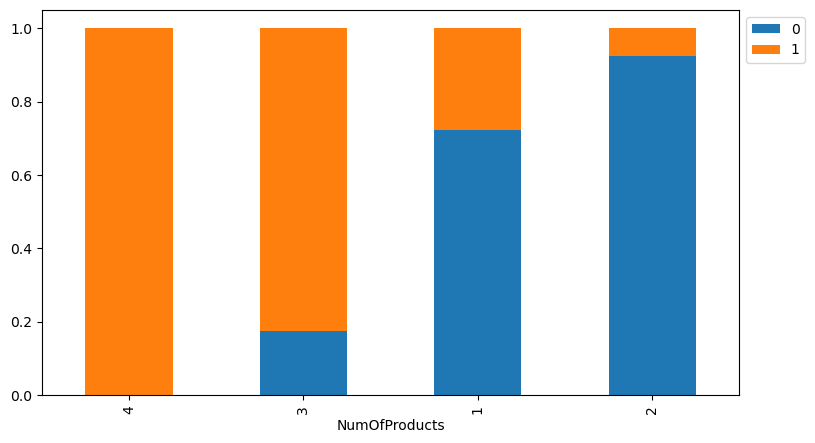

In [40]:
stacked_barplot(data, "NumOfProducts", "Exited")

In [41]:
distribution_plot_wrt_target(data, "NumOfProducts", "Exited")

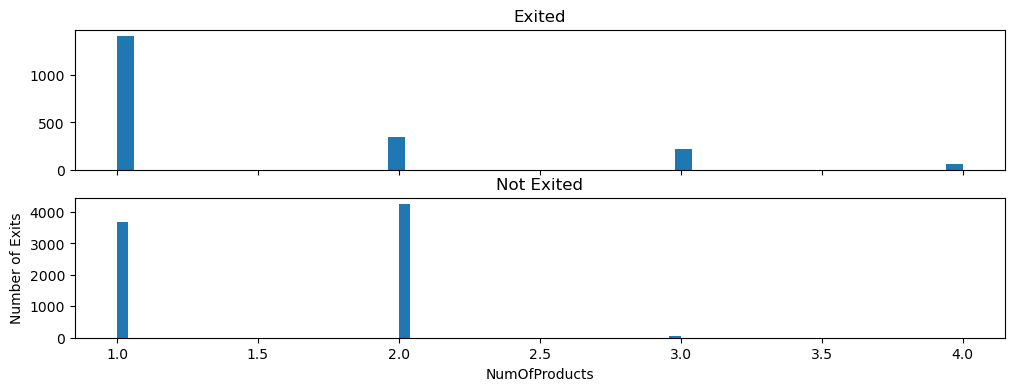

In [42]:
#Histrogram for feature Time
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

ax1.hist(data["NumOfProducts"][data["Exited"] == 1], bins = 50)
ax1.set_title('Exited')

ax2.hist(data["NumOfProducts"][data["Exited"] == 0], bins = 50)
ax2.set_title('Not Exited')

plt.xlabel('NumOfProducts')
plt.ylabel('Number of Exits')
plt.show()

* The majority of the customers (5084 or 50.84%) have only one product with the bank, followed by customers with two products (4590 or 45.90%).
* Customers with three or four products have a higher proportion of exits (220/266 = 82.71% and 60/60 = 100%, respectively) but they represent a very small percentage of the total customers (2.66% and 0.60%, respectively).
* The bank may want to focus on retaining customers with only four producst, as they have a higher exit rate


**HasCrCard vs Exited**

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


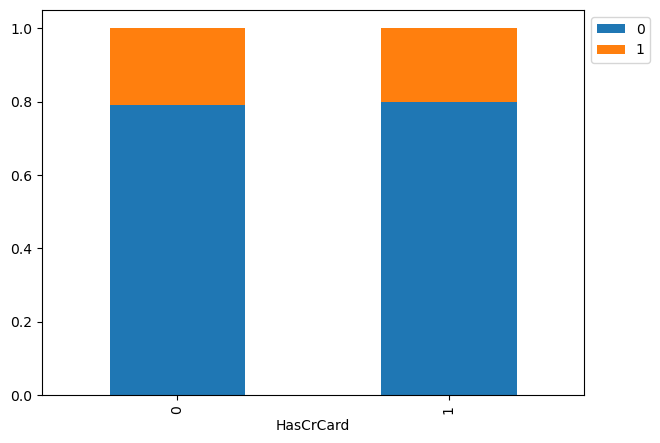

In [43]:
stacked_barplot(data, "HasCrCard", "Exited")

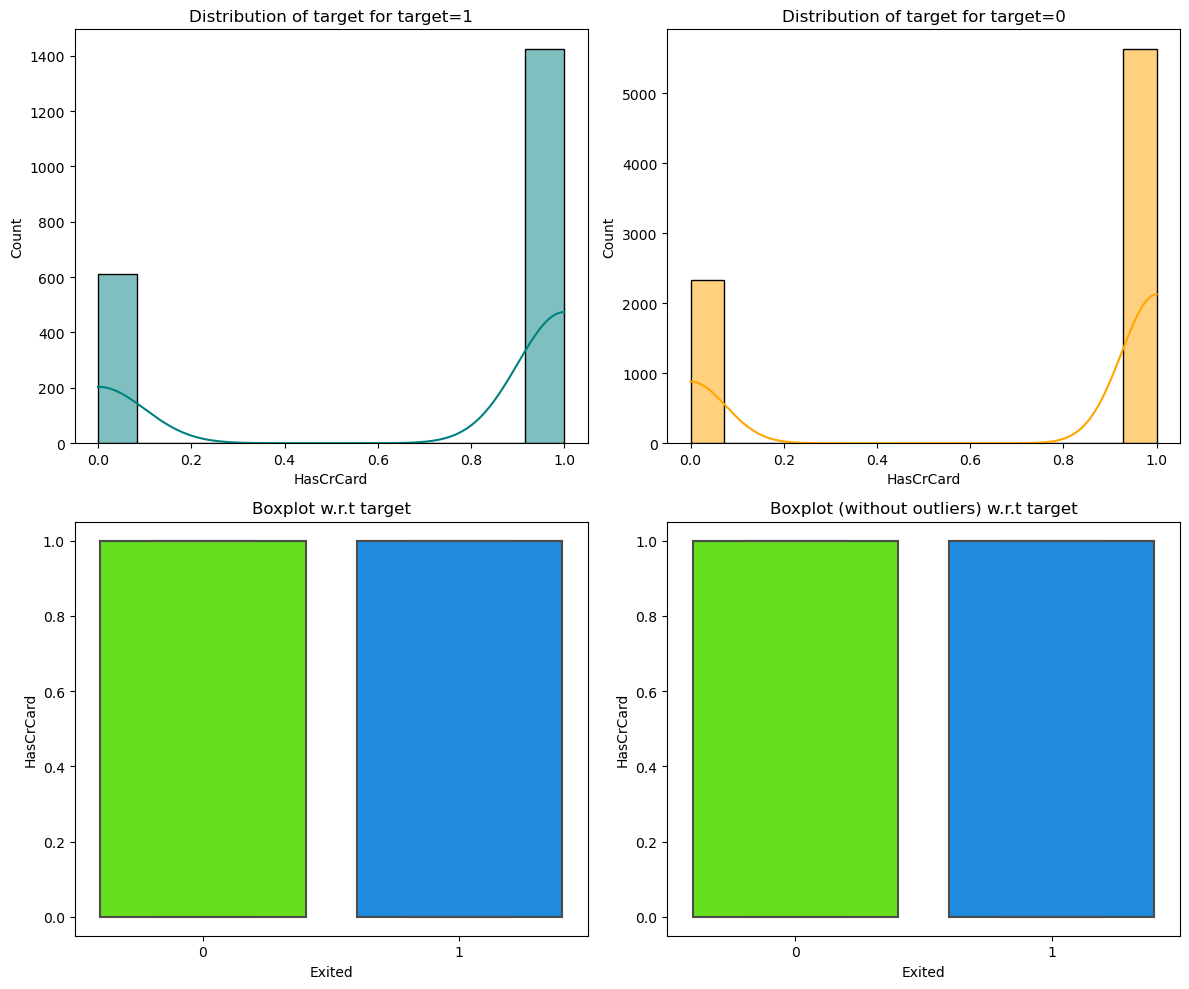

In [44]:
distribution_plot_wrt_target(data, "HasCrCard", "Exited")

In [45]:
#Histrogram for feature Time
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

ax1.hist(data["HasCrCard"][data["Exited"] == 1], bins = 50)
ax1.set_title('Exited')

ax2.hist(data["HasCrCard"][data["Exited"] == 0], bins = 50)
ax2.set_title('Not Exited')

plt.xlabel('HasCrCard')
plt.ylabel('Number of Exits')
plt.show()

* The majority of the customers have a credit card, with 7055 customers (70.55%) having a credit card and 2945 customers (29.45%) not having a credit card.
* The proportion of customers who have exited the bank is higher for customers who have a credit card (1424/7055 = 20.18%) as compared to customers who do not have a credit card (613/2945 = 20.82%).
* However, the difference in exit rate between customers with and without a credit card is not significant, and both groups have a similar overall exit rate of around 20%.
* Having a credit card does not seem to have a major impact on whether a customer will exit the bank or not.

**IsActiveMember vs Exited**

In [46]:
stacked_barplot(data, "IsActiveMember", "Exited")

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


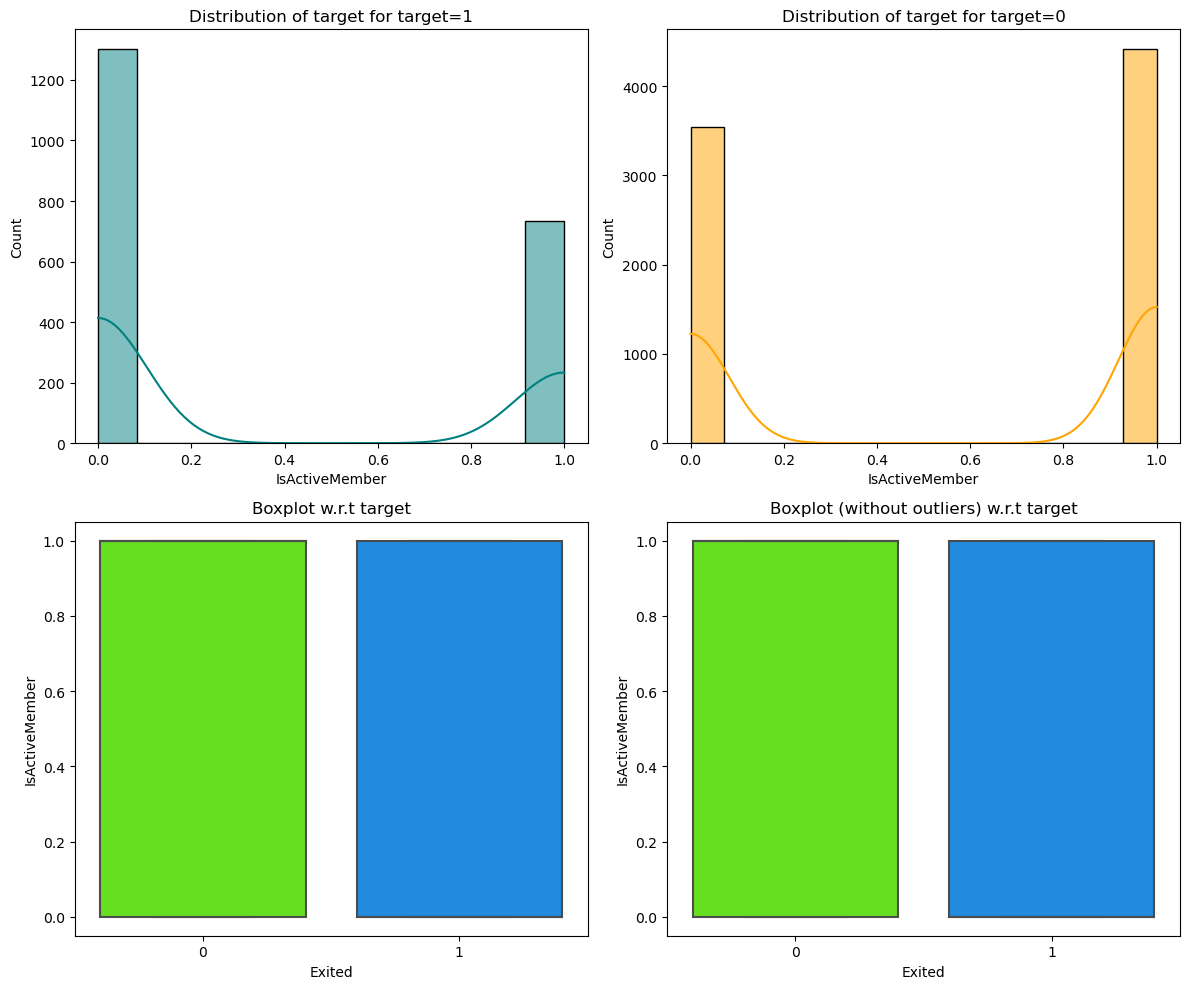

In [47]:
distribution_plot_wrt_target(data, "IsActiveMember", "Exited")

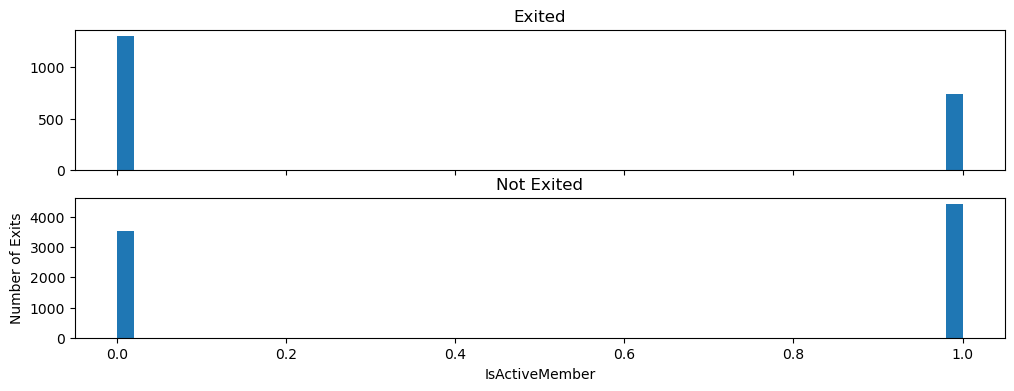

In [48]:
#Histrogram for feature Time
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

ax1.hist(data["IsActiveMember"][data["Exited"] == 1], bins = 50)
ax1.set_title('Exited')

ax2.hist(data["IsActiveMember"][data["Exited"] == 0], bins = 50)
ax2.set_title('Not Exited')

plt.xlabel('IsActiveMember')
plt.ylabel('Number of Exits')
plt.show()

* The majority of the customers are active members, with 5151 customers (51.51%) being active and 4849 customers (48.49%) being inactive.
* The proportion of customers who have exited the bank is higher for customers who are inactive members (1302/4849 = 26.86%) as compared to customers who are active members (735/5151 = 14.26%).
* The difference in exit rate between inactive and active members is significant, and inactive members have a much higher exit rate.
* Being an active member seems to be a significant factor in whether a customer will exit the bank or not.
* The bank may want to focus on encouraging inactive members to become more engaged with their services to reduce the rate of customer exits.

**EstimatedSalary vs Exited**

In [49]:
#stacked_barplot(data, "EstimatedSalary", "Exited")

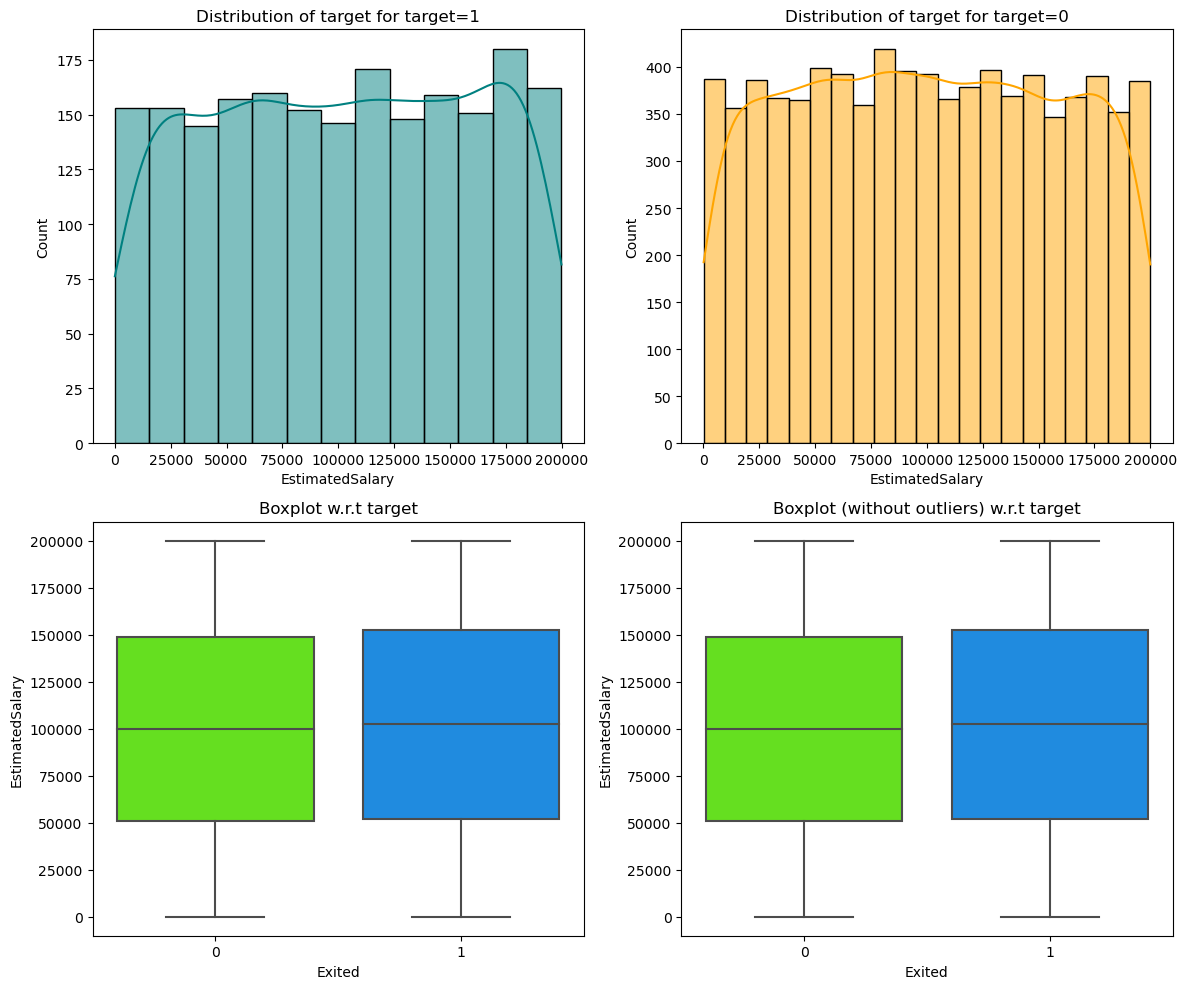

In [50]:
distribution_plot_wrt_target(data, "EstimatedSalary", "Exited")

In [51]:
#Histrogram for feature Time
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

ax1.hist(data["EstimatedSalary"][data["Exited"] == 1], bins = 50)
ax1.set_title('Exited')

ax2.hist(data["EstimatedSalary"][data["Exited"] == 0], bins = 50)
ax2.set_title('Not Exited')

plt.xlabel('EstimatedSalary')
plt.ylabel('Number of Exits')
plt.show()

**correlation**

In [52]:
data.corr()

CreditScore       Age    Tenure   Balance  NumOfProducts  \
CreditScore         1.000000 -0.003965  0.000842  0.006268       0.012238   
Age                -0.003965  1.000000 -0.009997  0.028308      -0.030680   
Tenure              0.000842 -0.009997  1.000000 -0.012254       0.013444   
Balance             0.006268  0.028308 -0.012254  1.000000      -0.304180   
NumOfProducts       0.012238 -0.030680  0.013444 -0.304180       1.000000   
HasCrCard          -0.005458 -0.011721  0.022583 -0.014858       0.003183   
IsActiveMember      0.025651  0.085472 -0.028362 -0.010084       0.009612   
EstimatedSalary    -0.001384 -0.007201  0.007784  0.012797       0.014204   
Exited             -0.027094  0.285323 -0.014001  0.118533      -0.047820   

                 HasCrCard  IsActiveMember  EstimatedSalary    Exited  
CreditScore      -0.005458        0.025651        -0.001384 -0.027094  
Age              -0.011721        0.085472        -0.007201  0.285323  
Tenure            0.022583       -0.028362         0.007784 -0.014001  
Balance          -0.014858       -0.010084         0.012797  0.118533  
NumOfProducts     0.003183        0.009612         0.014204 -0.047820  
HasCrCard         1.000000       -0.011866        -0.009933 -0.007138  
IsActiveMember   -0.011866        1.000000        -0.011421 -0.156128  
EstimatedSalary  -0.009933       -0.011421         1.000000  0.012097  
Exited           -0.007138       -0.156128         0.012097  1.000000

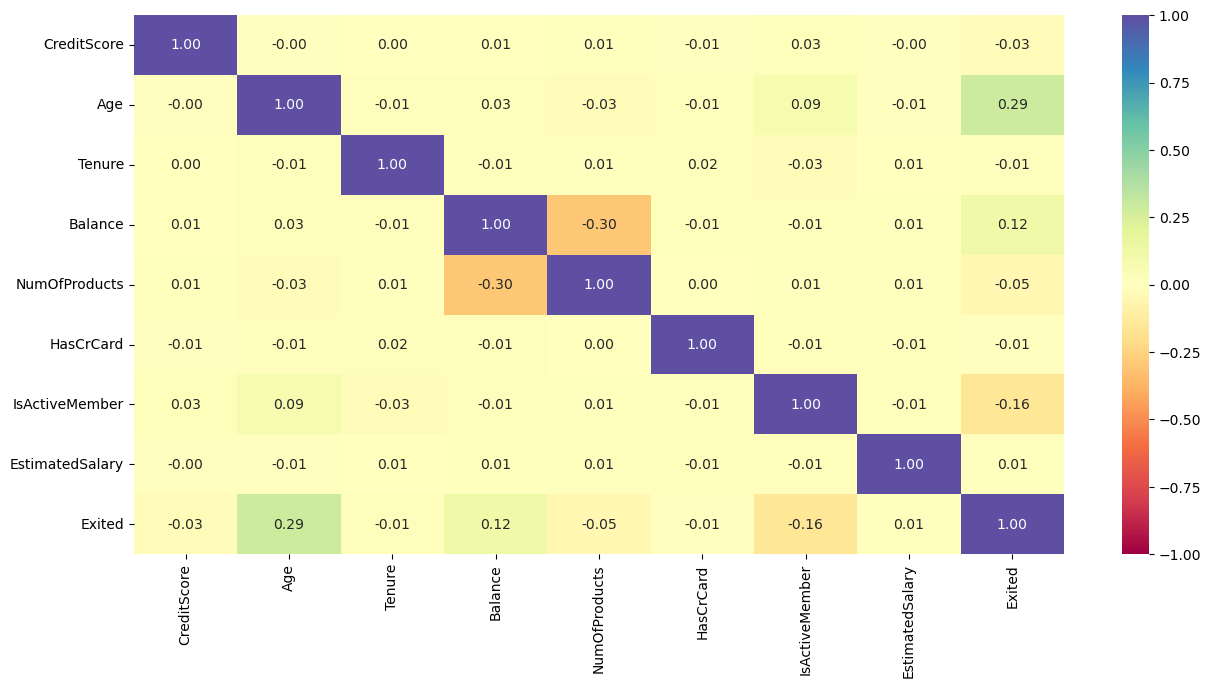

In [53]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* The CreditScore has a weak negative correlation with the Exited variable, which means that as the CreditScore increases, the likelihood of a customer leaving the bank decreases slightly.
* Age has a moderate positive correlation with the Exited variable, which indicates that older customers are more likely to leave the bank.
* Tenure has a weak negative correlation with the Exited variable, which suggests that customers who have been with the bank for longer are less likely to leave.
* Balance has a weak positive correlation with the Exited variable, which implies that customers with higher account balances are slightly more likely to leave the bank.
* NumOfProducts has a weak negative correlation with the Exited variable, indicating that customers with more products are slightly less likely to leave the bank.
* HasCrCard and EstimatedSalary have weak correlations with the Exited variable, indicating that they have little impact on whether a customer leaves the bank or not.
* IsActiveMember has a moderate negative correlation with the Exited variable, indicating that customers who are active members are less likely to leave the bank.

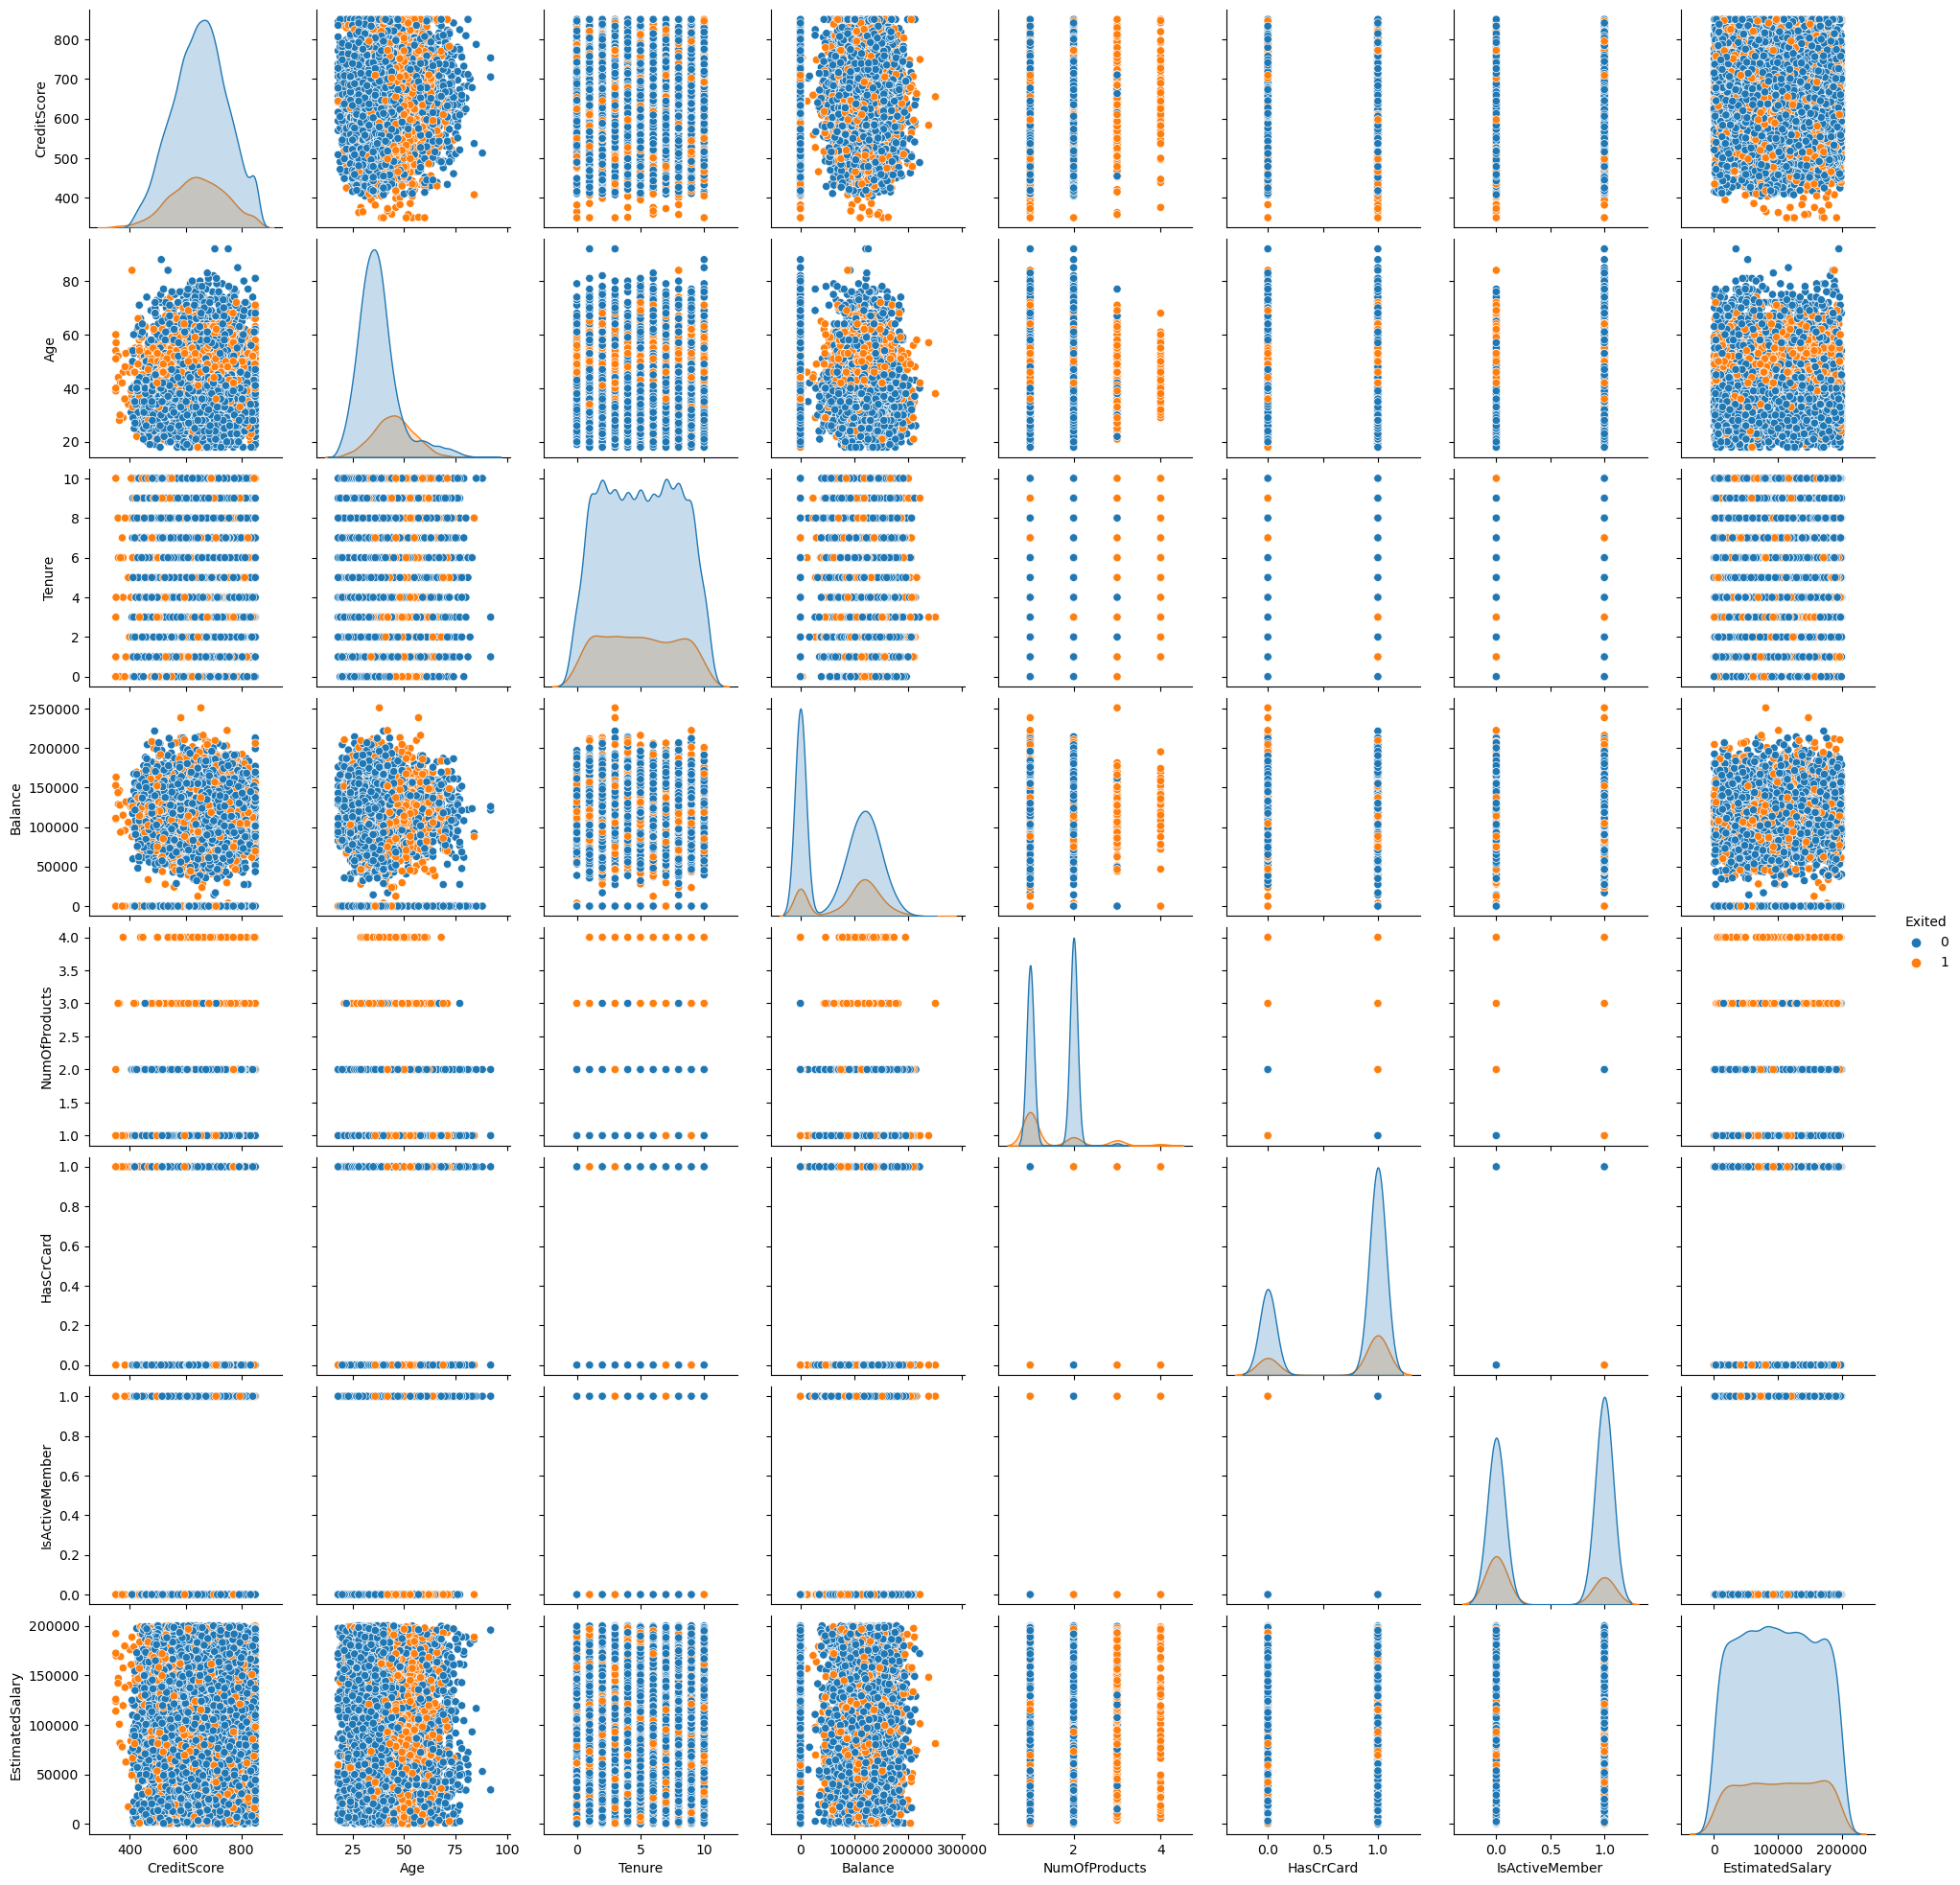

In [54]:
sns.pairplot(data=data, hue = 'Exited', diag_kind="kde")
plt.show()

**Inferences**

* There is no significant difference in the credit score distribution between retained and churned customers.
* The older customers are churning at more than the younger ones alluding to a difference in service preference in the age categories. The bank may need to review their target market or review the strategy for retention between the different age groups
* With regard to the tenure, the clients on either extreme end (spent little time with the bank or a lot of time with the bank) are more likely to churn compared to those that are of average tenure.
* Worryingly, the bank is losing customers with significant bank balances which is likely to hit their available capital for lending.
* Neither the product nor the salary has a significant effect on the likelihood to churn.
* we have seen that the salary has little effect on the chance of a customer churning. However as seen above, the ratio of the bank balance and the estimated salary indicates that customers with a higher balance salary ratio churn more which would be worrying to the bank as this impacts their source of loan capital.

## Outlier

In [55]:
Q1 = data.quantile(0.25)  # To find the 25th percentile and 75th percentile.
Q3 = data.quantile(0.75)

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

lower = (
    Q1 - 1.5 * IQR
)  # Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper = Q3 + 1.5 * IQR

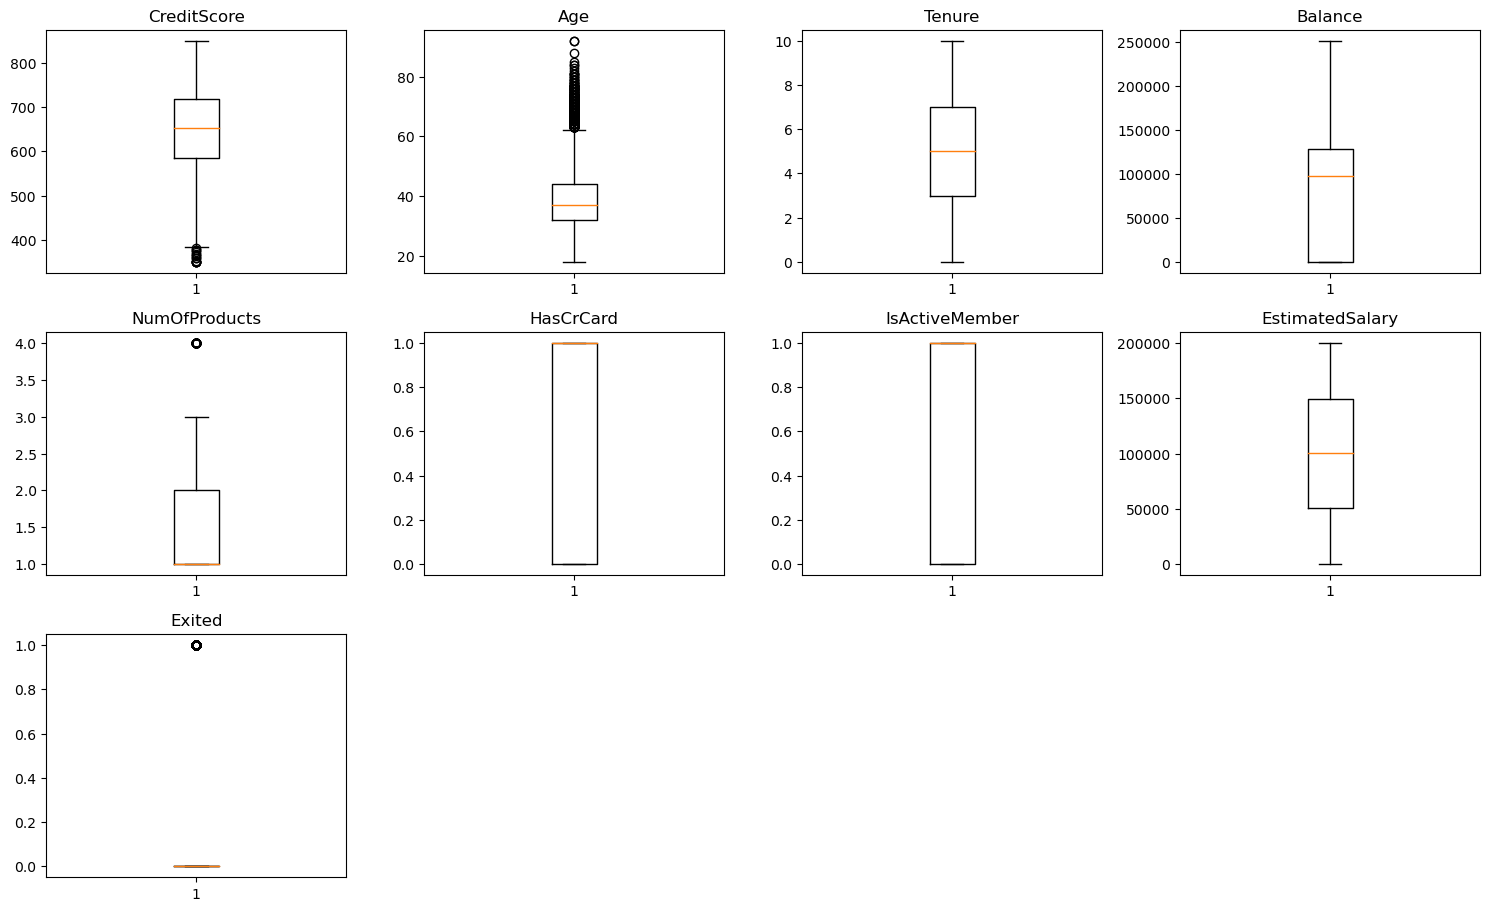

In [56]:
# outlier detection using boxplot
num_cols = data.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [57]:
threshold = 3
outlier = {}
num_cols = data.select_dtypes(include=np.number).columns.tolist()
for col in num_cols:
    i = data[col]
    mean = np.mean(data[col])
    std = np.std(data[col])
    list1 = []
    for v in i:
        z = (v - mean) / std
        if z > threshold:
            list1.append(v)
    list1.sort()
    outlier[i.name] = list1

print("The following are the outliers in the data:")
for key, value in outlier.items():
    print("\n", key, ":", value)

The following are the outliers in the data:

 CreditScore : []

 Age : [71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 75, 75, 75, 75, 75, 75, 75, 75, 75, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 78, 78, 78, 78, 78, 79, 79, 79, 79, 80, 80, 80, 81, 81, 81, 81, 82, 83, 84, 84, 85, 88, 92, 92]

 Tenure : []

 Balance : []

 NumOfProducts : [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]

 HasCrCard : []

 IsActiveMember : []

 EstimatedSalary : []

 Exited : []


### Splitting the data

In [58]:
data = data.drop('Surname', axis=1)

In [59]:
X = data.drop(['Exited'],axis=1)
Y = data[['Exited']]

In [60]:
# Splitting the dataset into the Training and Testing set.

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42,stratify = Y)

In [61]:
###Checking the shape of train and test sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 10)
(2000, 10)
(8000, 1)
(2000, 1)


### Normalizing

In [62]:
X_train.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
2151          753    France    Male   57       7       0.00              1   
8392          739   Germany    Male   32       3  102128.27              1   
5006          755   Germany  Female   37       0  113865.23              2   
4117          561    France    Male   37       5       0.00              2   
7182          692   Germany    Male   49       6  110540.43              2   

      HasCrCard  IsActiveMember  EstimatedSalary  
2151          1               0        159475.08  
8392          1               0         63981.37  
5006          1               1        117396.25  
4117          1               0         83093.25  
7182          0               1        107472.99

In [63]:
# Scaling the data
sc=StandardScaler()
temp = sc.fit(X_train[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])
X_train[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]] = temp.transform(X_train[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])
X_test[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]] = temp.transform(X_test[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])

In [64]:
# Scaling the data
# sc=StandardScaler()
# temp = sc.fit(X_train)
# X_train = temp.transform(X_train)
# X_test = temp.transform(X_test)

**For classification problem, there is no need of scaling the target variable**

### Categorical Encoding

In [65]:
## Storing required categorical variables in cat_dat to apply dummification 
cat_data = ["Geography",'Gender']

In [66]:
# Using pd.get dummies to encode the categorical columns in the data
X_train = pd.get_dummies(X_train,columns=cat_data,drop_first= True)
X_test = pd.get_dummies(X_test,columns=cat_data,drop_first= True)

In [67]:
X_train.head()

CreditScore       Age    Tenure   Balance  NumOfProducts  HasCrCard  \
2151     1.058568  1.715086  0.684723 -1.226059              1          1   
8392     0.913626 -0.659935 -0.696202  0.413288              1          1   
5006     1.079274 -0.184931 -1.731895  0.601687              2          1   
4117    -0.929207 -0.184931 -0.005739 -1.226059              2          1   
7182     0.427035  0.955079  0.339492  0.548318              2          0   

      IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
2151               0         1.042084                  0                0   
8392               0        -0.623556                  1                0   
5006               1         0.308128                  1                0   
4117               0        -0.290199                  0                0   
7182               1         0.135042                  1                0   

      Gender_Male  
2151            1  
8392            1  
5006            0  
4117            1  
7182            1

In [68]:
X_train.shape[:]

(8000, 11)

## Model Building

#### **A model can make wrong predictions in the following ways:**
* Predicting a an existing customer will NOT churn, when he/she will churn. - False Negative
* Predicting a an existing customer will churn, when he/she is not looking to churn. - Flase Positive


#### **Which case is more important?**

* Predicting the customers who will leave is very important to the banks buinsess case. This will enable to aviod loss of cutomers with chance of implementing buinsess strtegies or promotional offers to stay with the bank.  

#### **How to reduce this loss i.e need to reduce False Negatives as well as False Positives?**

* Company  would want `Recall` to be maximized, greater the Recall higher the chances of minimizing false Negative. Hence, the focus should be on increasing Recall or minimizing the false Negative or in other words identifying the True Positive(i.e. Class 1) so that the Company can identify the customers leaving. 

## Deep neural network

- We will use a simple NN made of fully-connected layers with ReLu activation. The NN takes a vector of length 11 as input. This represents the information related to each independent variable, ie each line with 11 columns from the dataset. For each transaction, the final layer will output a probability distribution (sigmoid activation function) and classify either as NOT churn (0) or Churn (1).

* We shall build sequential and fully connected neural network

### Model - Basic Architecture

In [69]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [70]:
# Initializing the ANN
model = Sequential()
# The amount of nodes (dimensions) in hidden layer should be the average of input and output layers, in this case 64.
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model.add(Dense(activation = 'relu', input_dim = X_train.shape[1] , units=64))
#Add 1st hidden layer
model.add(Dense(32, activation='relu'))
# Adding the output layer
# Notice that we do not need to specify input dim. 
# we have an output of 1 node, which is the the desired dimensions of our output (stay with the bank or not)
# We use the sigmoid because we want probability outcomes
model.add(Dense(1, activation = 'sigmoid')) 

In [71]:
# Create optimizer with default learning rate
# Compile the model
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

In [72]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


**Training - Forward pass and Backpropagation**

Training the model

In [73]:
history=model.fit(X_train, y_train,           
          validation_split=0.2,
          epochs=50,
          batch_size=32,verbose=1)

Epoch 1/50
200/200 [==============================] - 0s 1ms/step - loss: 0.5048 - accuracy: 0.7878 - val_loss: 0.4688 - val_accuracy: 0.8000
Epoch 2/50
200/200 [==============================] - 0s 814us/step - loss: 0.4605 - accuracy: 0.7964 - val_loss: 0.4543 - val_accuracy: 0.8000
Epoch 3/50
200/200 [==============================] - 0s 841us/step - loss: 0.4468 - accuracy: 0.7967 - val_loss: 0.4456 - val_accuracy: 0.7962
Epoch 4/50
200/200 [==============================] - 0s 752us/step - loss: 0.4387 - accuracy: 0.8022 - val_loss: 0.4398 - val_accuracy: 0.8031
Epoch 5/50
200/200 [==============================] - 0s 726us/step - loss: 0.4329 - accuracy: 0.8069 - val_loss: 0.4353 - val_accuracy: 0.8100
Epoch 6/50
200/200 [==============================] - 0s 707us/step - loss: 0.4286 - accuracy: 0.8103 - val_loss: 0.4317 - val_accuracy: 0.8194
Epoch 7/50
200/200 [==============================] - 0s 702us/step - loss: 0.4251 - accuracy: 0.8125 - val_loss: 0.4293 - val_accuracy: 0

63/63 [==============================] - 0s 589us/step - loss: 0.3796 - accuracy: 0.8405


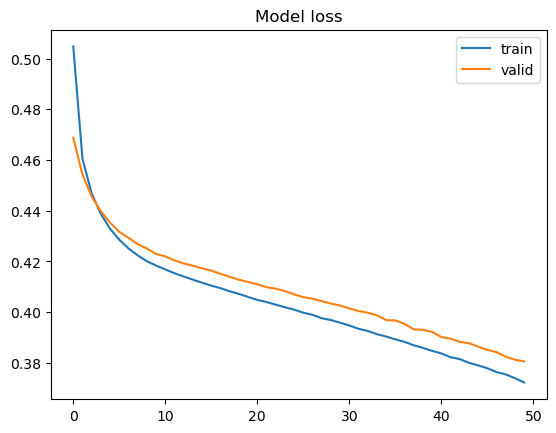

In [74]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.title('Model loss')
plt.legend(("train" , "valid") , loc =0)

#Printing results
results = model.evaluate(X_test, y_test)

In [75]:
score = model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 512us/step - loss: 0.3796 - accuracy: 0.8405


63/63 [==============================] - 0s 444us/step
Best Threshold=0.229224, G-Mean=0.752


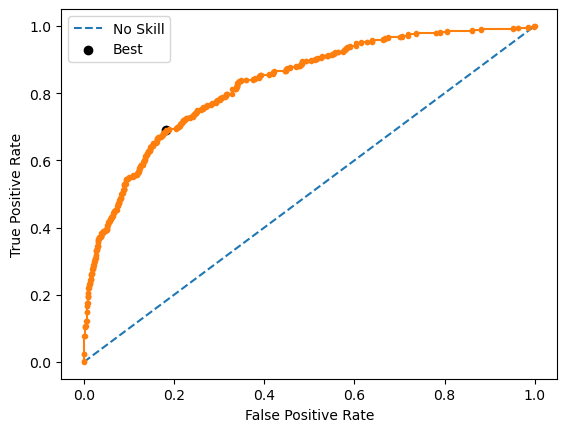

In [76]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat = model.predict(X_test)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [77]:
y_pred=model.predict(X_test)
y_pred = (y_pred > 0.22)
y_pred

63/63 [==============================] - 0s 418us/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [78]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))



    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    
    if title:
        plt.title(title)

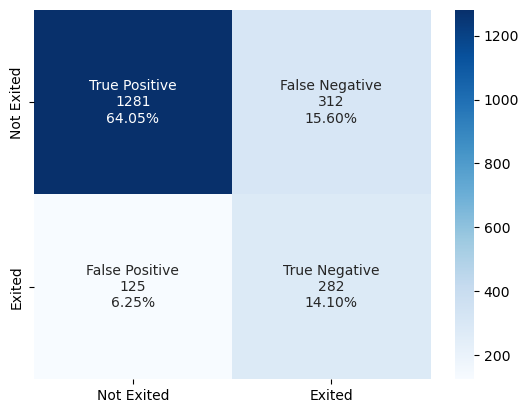

In [79]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Exited','Exited']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [80]:
#Accuracy as per the classification report 
from sklearn import metrics
cr=metrics.classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.80      0.85      1593
           1       0.47      0.69      0.56       407

    accuracy                           0.78      2000
   macro avg       0.69      0.75      0.71      2000
weighted avg       0.82      0.78      0.80      2000



**Inferences**

* The model architecture consists of 3 dense layers with 64, 32, and 1 neurons respectively. The model has a total of 2,881 parameters, and all of them are trainable.

* The model evaluation shows that the overall accuracy of the model is 78%, which means that the model has classified 78% of the samples correctly. However, when we look at the recall metric, which is more important for class 1 (Exited), the model has a recall of 0.69, which means that it has correctly identified 69% of the customers who exited the bank.

* The precision score of the model for class 1 is 0.47, which means that out of all the customers that the model predicted as exited, only 47% actually exited the bank. This indicates that the model has a relatively high number of false positives for class 1, which could be improved.

* Overall, the model has room for improvement, especially in terms of correctly predicting class 1.

### Model #1 - Adding Hidden layers

In [81]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [82]:
model1 = Sequential()
      #Adding the hidden and output layers
model1.add(Dense(256,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
model1.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model1.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model1.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
model1.add(Dense(1, activation = 'sigmoid'))
      #Compiling the ANN with Adam optimizer and binary cross entropy loss function 
optimizer = tf.keras.optimizers.Adam(0.001)
model1.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [83]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3072      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 46,337
Trainable params: 46,337
Non-trainable params: 0
_________________________________________________________________


In [84]:
history1 = model1.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
100/100 [==============================] - 0s 2ms/step - loss: 0.4688 - accuracy: 0.7928 - val_loss: 0.4153 - val_accuracy: 0.8319
Epoch 2/50
100/100 [==============================] - 0s 1ms/step - loss: 0.4014 - accuracy: 0.8295 - val_loss: 0.3868 - val_accuracy: 0.8519
Epoch 3/50
100/100 [==============================] - 0s 1ms/step - loss: 0.3780 - accuracy: 0.8414 - val_loss: 0.3874 - val_accuracy: 0.8419
Epoch 4/50
100/100 [==============================] - 0s 1ms/step - loss: 0.3617 - accuracy: 0.8483 - val_loss: 0.3660 - val_accuracy: 0.8500
Epoch 5/50
100/100 [==============================] - 0s 1ms/step - loss: 0.3497 - accuracy: 0.8527 - val_loss: 0.3540 - val_accuracy: 0.8625
Epoch 6/50
100/100 [==============================] - 0s 1ms/step - loss: 0.3438 - accuracy: 0.8567 - val_loss: 0.3513 - val_accuracy: 0.8644
Epoch 7/50
100/100 [==============================] - 0s 1ms/step - loss: 0.3324 - accuracy: 0.8619 - val_loss: 0.3574 - val_accuracy: 0.8562
Epoch 

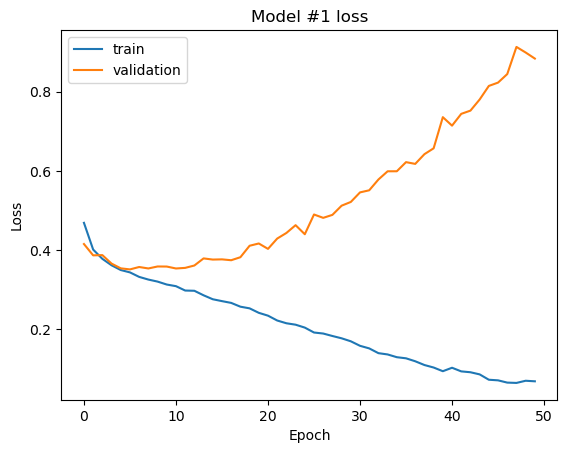

In [85]:
#Plotting Train Loss vs Validation Loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model #1 loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [86]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat1 = model1.predict(X_test)
# keep probabilities for the positive outcome only
yhat1 = yhat1[:, 0]
# calculate roc curves
fpr, tpr, thresholds1 = roc_curve(y_test, yhat1)
# calculate the g-mean for each threshold
gmeans1 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans1)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds1[ix], gmeans1[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

63/63 [==============================] - 0s 570us/step
Best Threshold=0.058082, G-Mean=0.737


In [87]:
#Predicting the results using best as a threshold
y_pred_e1=model1.predict(X_test)
y_pred_e1 = (y_pred_e1 > thresholds1[ix])
y_pred_e1

63/63 [==============================] - 0s 581us/step


array([[False],
       [ True],
       [False],
       ...,
       [ True],
       [False],
       [False]])

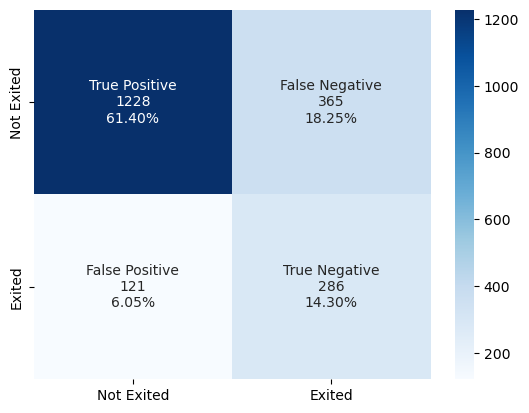

In [88]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test, y_pred_e1)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = ['Not Exited','Exited']
make_confusion_matrix(cm1, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [89]:
#Accuracy as per the classification report 
from sklearn import metrics
cr1=metrics.classification_report(y_test,y_pred_e1)
print(cr1)

              precision    recall  f1-score   support

           0       0.91      0.77      0.83      1593
           1       0.44      0.70      0.54       407

    accuracy                           0.76      2000
   macro avg       0.67      0.74      0.69      2000
weighted avg       0.81      0.76      0.77      2000



**Inferences** 

* The model1 has significantly more parameters than the previous model, indicating a more complex architecture. 
* However, the recall for class 1 has only increased slightly from 0.69 to 0.70, which means the model is still not identifying a considerable number of positive cases. 
* This implies that the model is still NOT performing well in identifying customers who are likely to exit the bank. 
* Therefore, the model1 needs further improvement to increase its performance in predicting customer churn.

### Model #2 - Adding Batch Normalization

In [90]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [91]:
model2 = Sequential()
model2.add(Dense(128,activation='relu',input_dim = X_train.shape[1]))
model2.add(BatchNormalization())
model2.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model2.add(BatchNormalization())
model2.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
model2.add(Dense(1, activation = 'sigmoid'))

In [92]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 3

In [93]:
optimizer = tf.keras.optimizers.Adam(0.001)
model2.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [94]:
history_2 = model2.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
100/100 [==============================] - 1s 2ms/step - loss: 0.4856 - accuracy: 0.7645 - val_loss: 0.4566 - val_accuracy: 0.8125
Epoch 2/50
100/100 [==============================] - 0s 1ms/step - loss: 0.3772 - accuracy: 0.8400 - val_loss: 0.4002 - val_accuracy: 0.8294
Epoch 3/50
100/100 [==============================] - 0s 963us/step - loss: 0.3524 - accuracy: 0.8542 - val_loss: 0.3626 - val_accuracy: 0.8431
Epoch 4/50
100/100 [==============================] - 0s 1ms/step - loss: 0.3400 - accuracy: 0.8584 - val_loss: 0.3499 - val_accuracy: 0.8519
Epoch 5/50
100/100 [==============================] - 0s 1ms/step - loss: 0.3267 - accuracy: 0.8623 - val_loss: 0.3361 - val_accuracy: 0.8719
Epoch 6/50
100/100 [==============================] - 0s 1ms/step - loss: 0.3234 - accuracy: 0.8653 - val_loss: 0.3367 - val_accuracy: 0.8619
Epoch 7/50
100/100 [==============================] - 0s 1ms/step - loss: 0.3175 - accuracy: 0.8681 - val_loss: 0.3455 - val_accuracy: 0.8525
Epoc

In [95]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('Model #2 loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [96]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat2 = model2.predict(X_test)
# keep probabilities for the positive outcome only
yhat2 = yhat2[:, 0]
# calculate roc curves
fpr, tpr, thresholds2 = roc_curve(y_test, yhat2)
# calculate the g-mean for each threshold
gmeans2 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans2)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds2[ix], gmeans2[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

63/63 [==============================] - 0s 505us/step
Best Threshold=0.108587, G-Mean=0.726


In [97]:
y_pred_e2=model2.predict(X_test)
y_pred_e2 = (y_pred_e2 > thresholds2[ix])
y_pred_e2

63/63 [==============================] - 0s 553us/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [98]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm2=confusion_matrix(y_test, y_pred_e2)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = ['Not Exited','Exited']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [99]:
#Accuracy as per the classification report 
from sklearn import metrics
cr2=metrics.classification_report(y_test,y_pred_e2)
print(cr2)

              precision    recall  f1-score   support

           0       0.90      0.77      0.83      1593
           1       0.43      0.69      0.53       407

    accuracy                           0.75      2000
   macro avg       0.67      0.73      0.68      2000
weighted avg       0.81      0.75      0.77      2000



**Inferences**
* Model 2: recall for class 1 is 0.69, which is the same as Model 1. However, Model 2 has a lower overall accuracy and f1-score compared to Model 1, which suggests that it may not be performing as well overall.

### Model #3 - Adding Dropout

In [100]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [101]:
model3 = Sequential()
model3.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
model3.add(Dropout(0.2))
model3.add(Dense(128,activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(64,activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(32,activation='relu'))
model3.add(Dense(1, activation = 'sigmoid'))

In [102]:
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3072      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2

In [103]:
optimizer = tf.keras.optimizers.Adam(0.001)
model3.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [104]:
history_3 = model3.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
100/100 [==============================] - 0s 2ms/step - loss: 0.4769 - accuracy: 0.7884 - val_loss: 0.4337 - val_accuracy: 0.8081
Epoch 2/50
100/100 [==============================] - 0s 1ms/step - loss: 0.4286 - accuracy: 0.8086 - val_loss: 0.4277 - val_accuracy: 0.8338
Epoch 3/50
100/100 [==============================] - 0s 1ms/step - loss: 0.4183 - accuracy: 0.8211 - val_loss: 0.4065 - val_accuracy: 0.8419
Epoch 4/50
100/100 [==============================] - 0s 1ms/step - loss: 0.4021 - accuracy: 0.8302 - val_loss: 0.3860 - val_accuracy: 0.8494
Epoch 5/50
100/100 [==============================] - 0s 1ms/step - loss: 0.3945 - accuracy: 0.8363 - val_loss: 0.3835 - val_accuracy: 0.8537
Epoch 6/50
100/100 [==============================] - 0s 1ms/step - loss: 0.3798 - accuracy: 0.8439 - val_loss: 0.3647 - val_accuracy: 0.8619
Epoch 7/50
100/100 [==============================] - 0s 1ms/step - loss: 0.3702 - accuracy: 0.8462 - val_loss: 0.3503 - val_accuracy: 0.8700
Epoch 

In [105]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('Model #3 loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [106]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat3 = model3.predict(X_test)
# keep probabilities for the positive outcome only
yhat3 = yhat3[:, 0]
# calculate roc curves
fpr, tpr, thresholds3 = roc_curve(y_test, yhat3)
# calculate the g-mean for each threshold
gmeans3 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans3)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds3[ix], gmeans3[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

63/63 [==============================] - 0s 613us/step
Best Threshold=0.163636, G-Mean=0.760


In [107]:
y_pred_e3=model3.predict(X_test)
y_pred_e3 = (y_pred_e3 > thresholds3[ix])
y_pred_e3

63/63 [==============================] - 0s 628us/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [108]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm3=confusion_matrix(y_test, y_pred_e3)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = ['Not Exited','Exited']
make_confusion_matrix(cm3, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [109]:
#Accuracy as per the classification report 
from sklearn import metrics
cr3=metrics.classification_report(y_test,y_pred_e3)
print(cr3)

              precision    recall  f1-score   support

           0       0.92      0.79      0.85      1593
           1       0.47      0.73      0.57       407

    accuracy                           0.78      2000
   macro avg       0.69      0.76      0.71      2000
weighted avg       0.83      0.78      0.79      2000



**Inferences** 
* The third model achieved a recall of 0.73 for Class 1, which is better than all the modelss so far. 
* However, this model has a lower precision and accuracy compared to the first model, which means it has a higher number of false positives (i.e., cases where the model predicts that a customer will churn, but they actually don't).

### Model #4 - Keras Optimizer

In [110]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [111]:
def create_model_v4(lr,batch_size):  
    np.random.seed(1337)
    model = Sequential()
    model.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
    model.add(Dropout(0.3))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32,activation='relu')) 
    model.add(Dense(1, activation='sigmoid'))

    #compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [112]:
keras_estimator = KerasClassifier(build_fn=create_model_v4, verbose=1)
# define the grid search parameters
param_random = {
    'batch_size':[32, 64, 128],
    "lr":[0.01,0.1,0.001],}

kfold_splits = 3
random= RandomizedSearchCV(estimator=keras_estimator,  
                    verbose=1,
                    cv=kfold_splits,  
                    param_distributions=param_random,n_jobs=-1)

In [113]:
random_result = random.fit(X_train, y_train,validation_split=0.2,verbose=1) 

# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
means = random_result.cv_results_['mean_test_score']
stds = random_result.cv_results_['std_test_score']
params = random_result.cv_results_['params']

Fitting 3 folds for each of 9 candidates, totalling 27 fits
100/100 [==============================] - 0s 2ms/step - loss: 0.4544 - accuracy: 0.7892 - val_loss: 0.4539 - val_accuracy: 0.8000
Best: 0.810875 using {'lr': 0.01, 'batch_size': 64}


In [114]:
estimator_v4=create_model_v4(batch_size=random_result.best_params_['batch_size'],lr=random_result.best_params_['lr'])

estimator_v4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               3072      
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 32)               

In [115]:
optimizer = tf.keras.optimizers.Adam(random_result.best_params_['lr'])
estimator_v4.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history_4=estimator_v4.fit(X_train, y_train, epochs=50, batch_size = 64, verbose=1,validation_split=0.2)

Epoch 1/50
100/100 [==============================] - 0s 2ms/step - loss: 0.4526 - accuracy: 0.8048 - val_loss: 0.4420 - val_accuracy: 0.8131
Epoch 2/50
100/100 [==============================] - 0s 1ms/step - loss: 0.4334 - accuracy: 0.8231 - val_loss: 0.4077 - val_accuracy: 0.8300
Epoch 3/50
100/100 [==============================] - 0s 1ms/step - loss: 0.4148 - accuracy: 0.8264 - val_loss: 0.3927 - val_accuracy: 0.8444
Epoch 4/50
100/100 [==============================] - 0s 1ms/step - loss: 0.4032 - accuracy: 0.8284 - val_loss: 0.3905 - val_accuracy: 0.8444
Epoch 5/50
100/100 [==============================] - 0s 1ms/step - loss: 0.3976 - accuracy: 0.8364 - val_loss: 0.3774 - val_accuracy: 0.8500
Epoch 6/50
100/100 [==============================] - 0s 1ms/step - loss: 0.3938 - accuracy: 0.8313 - val_loss: 0.3628 - val_accuracy: 0.8656
Epoch 7/50
100/100 [==============================] - 0s 1ms/step - loss: 0.3849 - accuracy: 0.8361 - val_loss: 0.3619 - val_accuracy: 0.8544
Epoch 

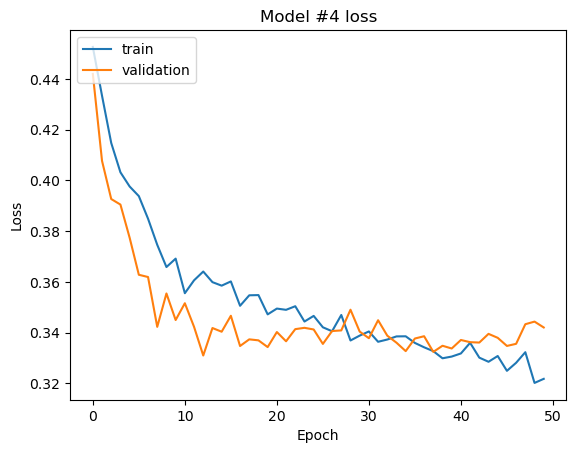

In [116]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('Model #4 loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [117]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat4 = estimator_v4.predict(X_test)
# keep probabilities for the positive outcome only
yhat4 = yhat4[:, 0]
# calculate roc curves
fpr, tpr, thresholds4 = roc_curve(y_test, yhat4)
# calculate the g-mean for each threshold
gmeans4 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans4)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds4[ix], gmeans4[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

63/63 [==============================] - 0s 626us/step
Best Threshold=0.151554, G-Mean=0.772


In [118]:
y_pred_e4=estimator_v4.predict(X_test)
y_pred_e4 = (y_pred_e4 > thresholds4[ix])
y_pred_e4

63/63 [==============================] - 0s 582us/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [119]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm4=confusion_matrix(y_test, y_pred_e4)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = ['Not Exited','Exited']
make_confusion_matrix(cm4, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [120]:
#Accuracy as per the classification report 
from sklearn import metrics
cr4=metrics.classification_report(y_test,y_pred_e4)
print(cr4)

              precision    recall  f1-score   support

           0       0.93      0.75      0.83      1593
           1       0.45      0.79      0.57       407

    accuracy                           0.76      2000
   macro avg       0.69      0.77      0.70      2000
weighted avg       0.83      0.76      0.78      2000



**Inferences**

* In Model3 architecture, we have a deeper neural network with four dense layers and three dropout layers. The number of parameters in this model is 46,337.

* The model achieved an accuracy of 76% on the test data, with a precision of 45% and recall of 79% for class 1 (positive class). This indicates that the model is able to correctly identify a large proportion of the positive class but has a higher rate of false positives.

* The F1-score for class 1 is 0.57. 

* The recall score for class 1 is the highest among all the models, indicating that this model is better at identifying positive cases. 

* However, the precision score is lower compared to other models, indicating that this model might produce more false positives.

### Model #5 - Keras Optimizer with Gridsearch CV

In [121]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [122]:
def create_model_v5(lr,batch_size):  
    np.random.seed(1337)
    model = Sequential()
    model.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
    model.add(Dropout(0.3))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32,activation='relu')) 
    model.add(Dense(1, activation='sigmoid'))

    #compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [123]:
keras_estimator = KerasClassifier(build_fn=create_model_v5, verbose=1)
# define the grid search parameters
param_grid = {
    'batch_size':[64,32, 128],
    "lr":[0.01,0.1,0.001],}

kfold_splits = 3
grid = GridSearchCV(estimator=keras_estimator,  
                    verbose=1,
                    cv=kfold_splits,  
                    param_grid=param_grid,n_jobs=-1)

In [124]:
import time
  
# store starting time
begin = time.time()


grid_result = grid.fit(X_train, y_train,validation_split=0.2,verbose=1) 

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

time.sleep(1)
# store end time
end = time.time()
  
# total time taken
print(f"Total runtime of the program is {end - begin}")

Fitting 3 folds for each of 9 candidates, totalling 27 fits
100/100 [==============================] - 0s 2ms/step - loss: 0.4789 - accuracy: 0.7869 - val_loss: 0.4342 - val_accuracy: 0.8000
Best: 0.802625 using {'batch_size': 64, 'lr': 0.001}
Total runtime of the program is 4.587558031082153


In [125]:
estimator_v5=create_model_v5(batch_size=grid_result.best_params_['batch_size'],lr=grid_result.best_params_['lr'])

estimator_v5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               3072      
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 32)               

In [126]:
optimizer = tf.keras.optimizers.Adam(grid_result.best_params_['lr'])
estimator_v5.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history_5=estimator_v5.fit(X_train, y_train, epochs=50, batch_size = 64, verbose=1,validation_split=0.2)

Epoch 1/50
100/100 [==============================] - 0s 2ms/step - loss: 0.4603 - accuracy: 0.7977 - val_loss: 0.4289 - val_accuracy: 0.8263
Epoch 2/50
100/100 [==============================] - 0s 1ms/step - loss: 0.4313 - accuracy: 0.8094 - val_loss: 0.4211 - val_accuracy: 0.8325
Epoch 3/50
100/100 [==============================] - 0s 1ms/step - loss: 0.4195 - accuracy: 0.8175 - val_loss: 0.4014 - val_accuracy: 0.8344
Epoch 4/50
100/100 [==============================] - 0s 1ms/step - loss: 0.4062 - accuracy: 0.8291 - val_loss: 0.3881 - val_accuracy: 0.8481
Epoch 5/50
100/100 [==============================] - 0s 1ms/step - loss: 0.3985 - accuracy: 0.8330 - val_loss: 0.3829 - val_accuracy: 0.8506
Epoch 6/50
100/100 [==============================] - 0s 1ms/step - loss: 0.3881 - accuracy: 0.8389 - val_loss: 0.3707 - val_accuracy: 0.8512
Epoch 7/50
100/100 [==============================] - 0s 1ms/step - loss: 0.3820 - accuracy: 0.8373 - val_loss: 0.3667 - val_accuracy: 0.8525
Epoch 

In [127]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('Model #5 loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

63/63 [==============================] - 0s 595us/step
Best Threshold=0.247244, G-Mean=0.758


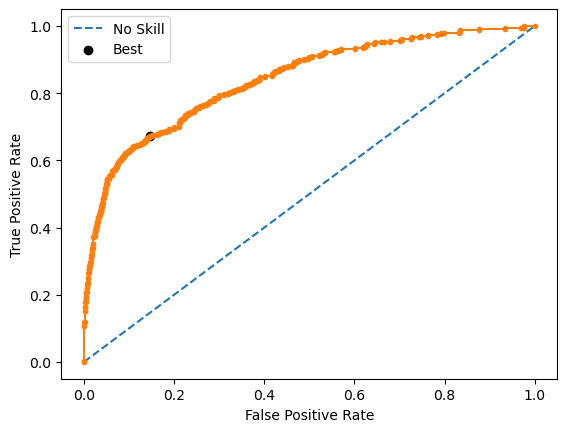

In [128]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat5 = estimator_v5.predict(X_test)
# keep probabilities for the positive outcome only
yhat5 = yhat5[:, 0]
# calculate roc curves
fpr, tpr, thresholds5 = roc_curve(y_test, yhat5)
# calculate the g-mean for each threshold
gmeans5 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans5)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds5[ix], gmeans5[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [129]:
y_pred_e5=estimator_v5.predict(X_test)
y_pred_e5 = (y_pred_e5 > thresholds5[ix])
y_pred_e5

63/63 [==============================] - 0s 574us/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

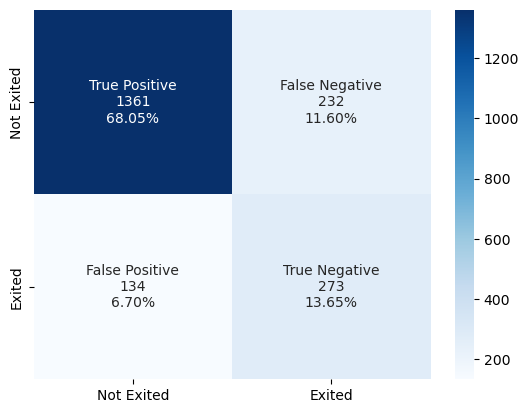

In [130]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm5=confusion_matrix(y_test, y_pred_e5)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = ['Not Exited','Exited']
make_confusion_matrix(cm5, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [131]:
#Accuracy as per the classification report 
from sklearn import metrics
cr5=metrics.classification_report(y_test,y_pred_e5)
print(cr5)

              precision    recall  f1-score   support

           0       0.91      0.85      0.88      1593
           1       0.54      0.67      0.60       407

    accuracy                           0.82      2000
   macro avg       0.73      0.76      0.74      2000
weighted avg       0.84      0.82      0.82      2000



### Model #6 - Keras Tuner

In [132]:
## Install Keras Tuner
#!pip install keras-tuner 

In [133]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [134]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

In [135]:
def build_model(h):
    model = keras.Sequential()
    for i in range(h.Int('num_layers', 2, 10)):
        model.add(layers.Dense(units=h.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=256,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            h.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [136]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
     project_name='Job_')

INFO:tensorflow:Reloading Tuner from .\Job_\tuner0.json


In [137]:
tuner.search_space_summary()

Search space summary
Default search space size: 12
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 10, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
units_5 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
units_6

In [138]:
### Searching the best model on X and y train
tuner.search(X_train, y_train,
             epochs=5,
             validation_split = 0.2)

INFO:tensorflow:Oracle triggered exit


In [139]:
## Printing the best models with their hyperparameters
tuner.results_summary()

Results summary
Results in .\Job_
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 3 summary
Hyperparameters:
num_layers: 5
units_0: 32
units_1: 64
learning_rate: 0.01
units_2: 96
units_3: 256
units_4: 256
units_5: 160
units_6: 192
units_7: 224
units_8: 224
Score: 0.8712499936421713

Trial 2 summary
Hyperparameters:
num_layers: 9
units_0: 192
units_1: 64
learning_rate: 0.001
units_2: 160
units_3: 32
units_4: 224
units_5: 32
units_6: 256
units_7: 96
units_8: 192
Score: 0.8687500158945719

Trial 1 summary
Hyperparameters:
num_layers: 5
units_0: 160
units_1: 160
learning_rate: 0.001
units_2: 224
units_3: 128
units_4: 224
units_5: 64
units_6: 160
units_7: 64
units_8: 32
Score: 0.8683333396911621

Trial 0 summary
Hyperparameters:
num_layers: 9
units_0: 224
units_1: 96
learning_rate: 0.001
units_2: 32
units_3: 32
units_4: 32
units_5: 32
units_6: 32
units_7: 32
units_8: 32
Score: 0.8650000095367432

Trial 4 summary
Hyperparameters:
num_layers: 10
units_0: 128
unit

**Model #6**

In [140]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [141]:
model6 = Sequential()
model6.add(Dense(32,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
model6.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model6.add(Dense(96,activation='relu',kernel_initializer='he_uniform'))
model6.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model6.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
#model6.add(Dense(160,activation='relu',kernel_initializer='he_uniform'))
#model6.add(Dense(192,activation='relu',kernel_initializer='he_uniform'))
#model6.add(Dense(224,activation='relu',kernel_initializer='he_uniform'))
#model6.add(Dense(224,activation='relu',kernel_initializer='he_uniform'))
model6.add(Dense(1, activation = 'sigmoid'))

# From oberservation - With added hidden layers and increased complexity the ANN model is over fitting. So, removing (4) layers of hidden layers.

In [142]:
model6.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 96)                6240      
                                                                 
 dense_3 (Dense)             (None, 256)               24832     
                                                                 
 dense_4 (Dense)             (None, 256)               65792     
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 99,617
Trainable params: 99,617
Non-traina

In [143]:
optimizer = tf.keras.optimizers.Adam(0.001)
model6.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [144]:
history_6 = model6.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
100/100 [==============================] - 0s 2ms/step - loss: 0.4418 - accuracy: 0.8125 - val_loss: 0.4383 - val_accuracy: 0.8169
Epoch 2/50
100/100 [==============================] - 0s 1ms/step - loss: 0.4108 - accuracy: 0.8216 - val_loss: 0.4120 - val_accuracy: 0.8344
Epoch 3/50
100/100 [==============================] - 0s 1ms/step - loss: 0.3871 - accuracy: 0.8384 - val_loss: 0.3906 - val_accuracy: 0.8406
Epoch 4/50
100/100 [==============================] - 0s 1ms/step - loss: 0.3686 - accuracy: 0.8408 - val_loss: 0.3877 - val_accuracy: 0.8450
Epoch 5/50
100/100 [==============================] - 0s 2ms/step - loss: 0.3554 - accuracy: 0.8492 - val_loss: 0.3765 - val_accuracy: 0.8519
Epoch 6/50
100/100 [==============================] - 0s 1ms/step - loss: 0.3505 - accuracy: 0.8544 - val_loss: 0.3845 - val_accuracy: 0.8556
Epoch 7/50
100/100 [==============================] - 0s 1ms/step - loss: 0.3315 - accuracy: 0.8605 - val_loss: 0.3809 - val_accuracy: 0.8525
Epoch 

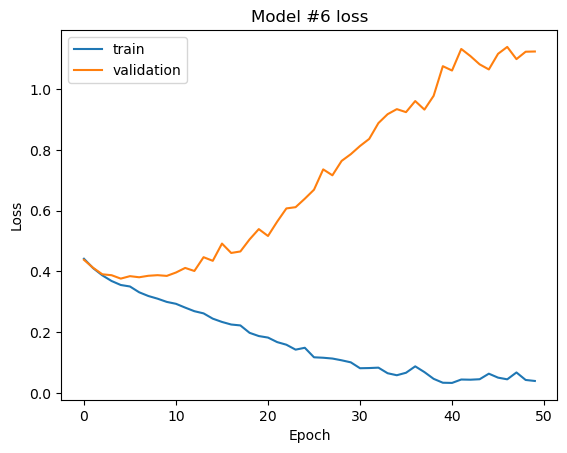

In [145]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_6.history['loss'])
plt.plot(history_6.history['val_loss'])
plt.title('Model #6 loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

63/63 [==============================] - 0s 564us/step
Best Threshold=0.059098, G-Mean=0.714


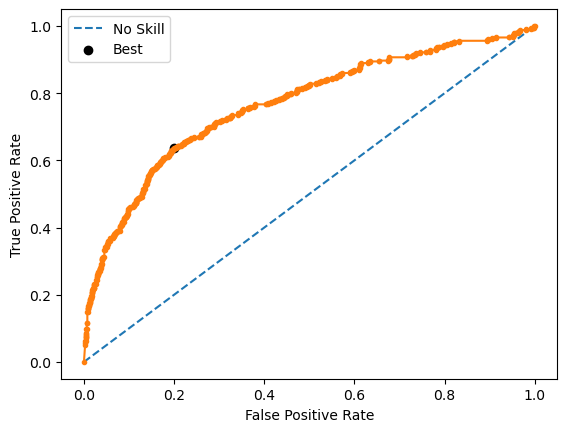

In [146]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat6 = model6.predict(X_test)
# keep probabilities for the positive outcome only
yhat6 = yhat6[:, 0]
# calculate roc curves
fpr, tpr, thresholds6 = roc_curve(y_test, yhat6)
# calculate the g-mean for each threshold
gmeans6 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans6)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds6[ix], gmeans6[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [147]:
y_pred_e6=model6.predict(X_test)
y_pred_e6 = (y_pred_e6 > thresholds6[ix])
y_pred_e6

63/63 [==============================] - 0s 597us/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [ True]])

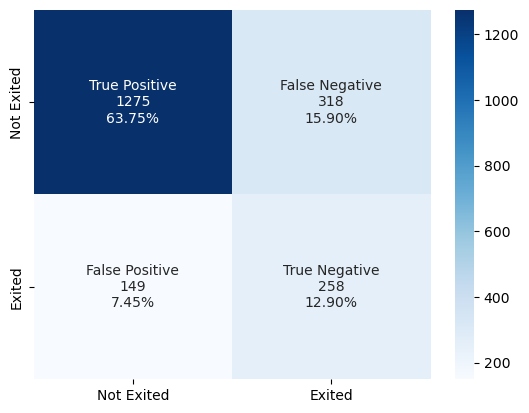

In [148]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm6=confusion_matrix(y_test, y_pred_e6)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = ['Not Exited','Exited']
make_confusion_matrix(cm6, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [149]:
#Accuracy as per the classification report 
from sklearn import metrics
cr6=metrics.classification_report(y_test,y_pred_e6)
print(cr6)

              precision    recall  f1-score   support

           0       0.90      0.80      0.85      1593
           1       0.45      0.63      0.52       407

    accuracy                           0.77      2000
   macro avg       0.67      0.72      0.69      2000
weighted avg       0.80      0.77      0.78      2000



**Infernces**

* The model has an overall accuracy of 0.77 and has correctly predicted 80% of the negative class (0) samples. 
* However, it has a relatively low recall score for the positive class (1) of 0.63, meaning it missed almost 40% of the positive samples. 
* The precision for the positive class is 0.45, meaning that out of all the samples predicted as positive, only 45% were actually positive.
* Overall, the model is not performing well in correctly identifying the positive class, which is the class of interest. 
* Further improvements are needed to increase the model's ability to detect the positive class.

### Model #7 - SMOTE + Keras Tuner

0    7963
1    2037
Name: Exited, dtype: int64


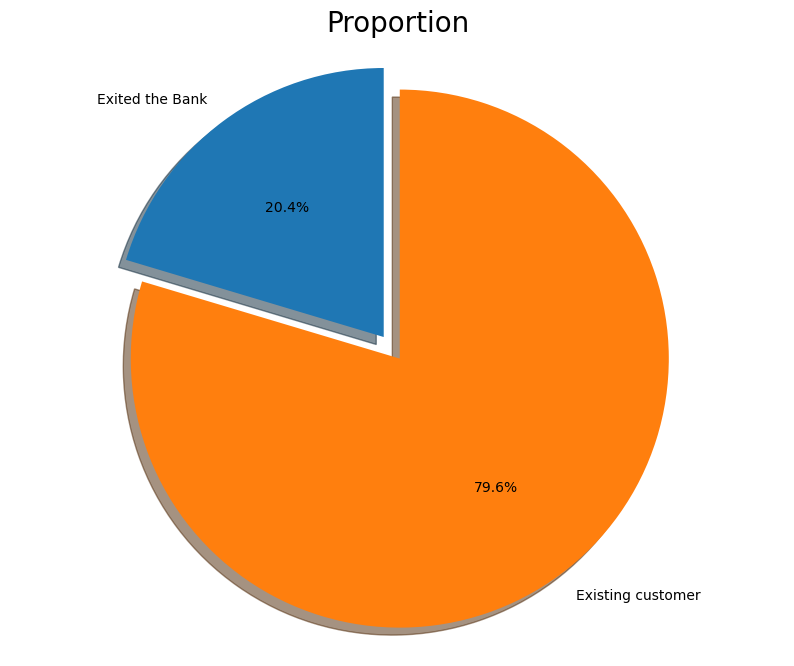

In [150]:
print(data.Exited.value_counts())
labels = 'Exited the Bank', 'Existing customer'
#sizes = [ds.is_promoted[ds['is_promoted']==1].count(), ds.is_promoted[ds['is_promoted']==0].count()]
sizes = [data.Exited[data['Exited']==1].count(),data.Exited[data['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion", size = 20)
plt.show()

In [151]:
(data[data['Exited'] == 1].shape[0] / (data.shape[0])) * 100

20.369999999999997

In [152]:
(data[data['Exited'] == 0].shape[0] / (data.shape[0])) * 100

79.63

* As Class 1 [Exited] customers are only 20.37 % vs 79.63% of Not exited customers trying SMOTE to balance the data set. 

In [153]:
# pip install -U scikit-learn imbalanced-learn

In [154]:
# pip install --upgrade scikit-learn

In [155]:
##Applying SMOTE on train and test
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='not majority')
X_sm , y_sm = smote.fit_resample(X_train,y_train)

In [156]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [157]:
def build_model_2(h):
    model = keras.Sequential()
    for i in range(h.Int('num_layers', 2, 10)):
        model.add(layers.Dense(units=h.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=256,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            h.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [158]:
tuner_2 = RandomSearch(
    build_model_2,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    project_name='Job_Switch')

INFO:tensorflow:Reloading Tuner from .\Job_Switch\tuner0.json


In [159]:
tuner_2.search_space_summary()

Search space summary
Default search space size: 12
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 10, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
units_5 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
units_6

In [160]:
tuner_2.search(X_sm, y_sm,
             epochs=5,
             validation_split = 0.2)

INFO:tensorflow:Oracle triggered exit


In [161]:
tuner_2.results_summary()

Results summary
Results in .\Job_Switch
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 2 summary
Hyperparameters:
num_layers: 9
units_0: 192
units_1: 64
learning_rate: 0.001
units_2: 160
units_3: 32
units_4: 224
units_5: 32
units_6: 256
units_7: 96
units_8: 192
Score: 0.7819204529126486

Trial 1 summary
Hyperparameters:
num_layers: 5
units_0: 160
units_1: 160
learning_rate: 0.001
units_2: 224
units_3: 128
units_4: 224
units_5: 64
units_6: 160
units_7: 64
units_8: 32
Score: 0.7690999507904053

Trial 3 summary
Hyperparameters:
num_layers: 5
units_0: 32
units_1: 64
learning_rate: 0.01
units_2: 96
units_3: 256
units_4: 256
units_5: 160
units_6: 192
units_7: 224
units_8: 224
Score: 0.767399271329244

Trial 0 summary
Hyperparameters:
num_layers: 9
units_0: 224
units_1: 96
learning_rate: 0.001
units_2: 32
units_3: 32
units_4: 32
units_5: 32
units_6: 32
units_7: 32
units_8: 32
Score: 0.7566719055175781

Trial 4 summary
Hyperparameters:
num_layers: 10
units_0: 128

**Model #7**

In [162]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [163]:
model7 = Sequential()
model7.add(Dense(192,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
model7.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model7.add(Dense(160,activation='relu',kernel_initializer='he_uniform'))
model7.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
model7.add(Dense(224,activation='relu',kernel_initializer='he_uniform'))
model7.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
model7.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model7.add(Dense(96,activation='relu',kernel_initializer='he_uniform'))
model7.add(Dense(192,activation='relu',kernel_initializer='he_uniform'))
model7.add(Dense(1, activation = 'sigmoid'))
      #Compiling the ANN with Adam optimizer and binary cross entropy loss function 
optimizer = tf.keras.optimizers.Adam(0.001)
model7.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [164]:
model7.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 192)               2304      
                                                                 
 dense_1 (Dense)             (None, 64)                12352     
                                                                 
 dense_2 (Dense)             (None, 160)               10400     
                                                                 
 dense_3 (Dense)             (None, 32)                5152      
                                                                 
 dense_4 (Dense)             (None, 224)               7392      
                                                                 
 dense_5 (Dense)             (None, 32)                7200      
                                                                 
 dense_6 (Dense)             (None, 256)               8

In [165]:
history_7 = model7.fit(X_sm,y_sm,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
160/160 [==============================] - 1s 2ms/step - loss: 0.5195 - accuracy: 0.7389 - val_loss: 0.5780 - val_accuracy: 0.7108
Epoch 2/50
160/160 [==============================] - 0s 2ms/step - loss: 0.4467 - accuracy: 0.7866 - val_loss: 0.7567 - val_accuracy: 0.5440
Epoch 3/50
160/160 [==============================] - 0s 1ms/step - loss: 0.4310 - accuracy: 0.7969 - val_loss: 0.4915 - val_accuracy: 0.7967
Epoch 4/50
160/160 [==============================] - 0s 2ms/step - loss: 0.4057 - accuracy: 0.8117 - val_loss: 0.6620 - val_accuracy: 0.6794
Epoch 5/50
160/160 [==============================] - 0s 2ms/step - loss: 0.3909 - accuracy: 0.8201 - val_loss: 0.5689 - val_accuracy: 0.7147
Epoch 6/50
160/160 [==============================] - 0s 2ms/step - loss: 0.3773 - accuracy: 0.8289 - val_loss: 0.3944 - val_accuracy: 0.8446
Epoch 7/50
160/160 [==============================] - 0s 2ms/step - loss: 0.3693 - accuracy: 0.8315 - val_loss: 0.4695 - val_accuracy: 0.7798
Epoch 

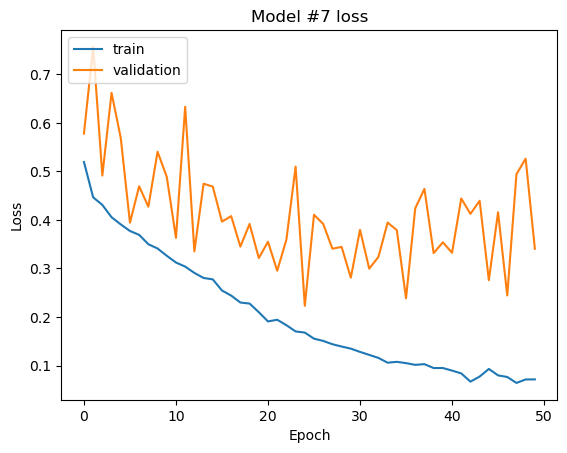

In [166]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_7.history['loss'])
plt.plot(history_7.history['val_loss'])
plt.title('Model #7 loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

63/63 [==============================] - 0s 682us/step
Best Threshold=0.031262, G-Mean=0.729


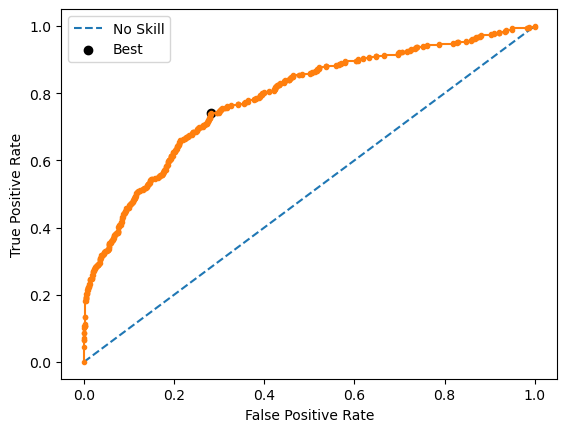

In [167]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat7 = model7.predict(X_test)
# keep probabilities for the positive outcome only
yhat7 = yhat7[:, 0]
# calculate roc curves
fpr, tpr, thresholds7 = roc_curve(y_test, yhat7)
# calculate the g-mean for each threshold
gmeans7 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans7)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds7[ix], gmeans7[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [168]:
y_pred_e7=model7.predict(X_test)
y_pred_e7 = (y_pred_e7 > thresholds7[ix])
y_pred_e7

63/63 [==============================] - 0s 611us/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [ True]])

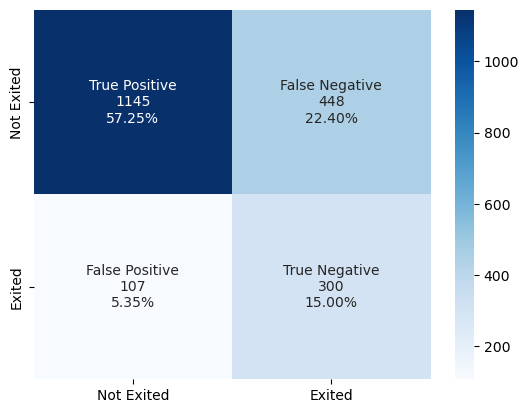

In [169]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm7=confusion_matrix(y_test, y_pred_e7)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = ['Not Exited','Exited']
make_confusion_matrix(cm7, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [170]:
#Accuracy as per the classification report 
from sklearn import metrics
cr7=metrics.classification_report(y_test,y_pred_e7)
print(cr7)

              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1593
           1       0.40      0.74      0.52       407

    accuracy                           0.72      2000
   macro avg       0.66      0.73      0.66      2000
weighted avg       0.81      0.72      0.75      2000



**Inferences**

* The recall score for Class 1 is 0.74 which indicates that the model is able to correctly identify only 74% of the customers who are actually going to churn.

* The precision score for Class 1 is 0.40 which means that out of all the customers predicted to churn, only 40% of them will actually churn.

* Overall, the model's performance can be improved by optimizing the hyperparameters, increasing the amount of data, and trying out different architectures.

* Based on the loss graph for Train vs Validation - The model captured lots of noise and is overfitting

### Model #8

In [171]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [172]:
def create_model_v8(lr,batch_size):  
    np.random.seed(1337)
    model = Sequential()
    model.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
    model.add(Dropout(0.3))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32,activation='relu')) 
    model.add(Dense(1, activation='sigmoid'))

    #compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [173]:
keras_estimator = KerasClassifier(build_fn=create_model_v8, verbose=1)

In [174]:
# define the grid search parameters
param_grid = {
    'batch_size':[32, 64, 128],
    "lr":[0.001,0.01,0.1],}

kfold_splits = 3
grid = GridSearchCV(estimator=keras_estimator,  
                    verbose=1,
                    cv=kfold_splits,  
                    param_grid=param_grid,n_jobs=-1)
grid_result = grid.fit(X_train, y_train,validation_split=0.2,verbose=1) 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
100/100 [==============================] - 0s 2ms/step - loss: 0.4544 - accuracy: 0.7892 - val_loss: 0.4539 - val_accuracy: 0.8000


In [175]:
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

Best: 0.809376 using {'batch_size': 64, 'lr': 0.01}


In [176]:
estimator_v8=create_model_v8(batch_size=grid_result.best_params_['batch_size'],lr=grid_result.best_params_['lr'])

estimator_v8.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               3072      
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 32)               

In [177]:
optimizer = tf.keras.optimizers.Adam(grid_result.best_params_['lr'])
estimator_v8.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history_8=estimator_v8.fit(X_sm, y_sm, epochs=50, batch_size = grid_result.best_params_['batch_size'], verbose=1,validation_split=0.2)

Epoch 1/50
160/160 [==============================] - 1s 2ms/step - loss: 0.5435 - accuracy: 0.7298 - val_loss: 0.5914 - val_accuracy: 0.7025
Epoch 2/50
160/160 [==============================] - 0s 2ms/step - loss: 0.4991 - accuracy: 0.7665 - val_loss: 0.6615 - val_accuracy: 0.5871
Epoch 3/50
160/160 [==============================] - 0s 2ms/step - loss: 0.4799 - accuracy: 0.7754 - val_loss: 0.5016 - val_accuracy: 0.7327
Epoch 4/50
160/160 [==============================] - 0s 2ms/step - loss: 0.4525 - accuracy: 0.7901 - val_loss: 0.7558 - val_accuracy: 0.5969
Epoch 5/50
160/160 [==============================] - 0s 2ms/step - loss: 0.4439 - accuracy: 0.7941 - val_loss: 0.5656 - val_accuracy: 0.6444
Epoch 6/50
160/160 [==============================] - 0s 2ms/step - loss: 0.4416 - accuracy: 0.7973 - val_loss: 0.5261 - val_accuracy: 0.7064
Epoch 7/50
160/160 [==============================] - 0s 2ms/step - loss: 0.4333 - accuracy: 0.8017 - val_loss: 0.5950 - val_accuracy: 0.6723
Epoch 

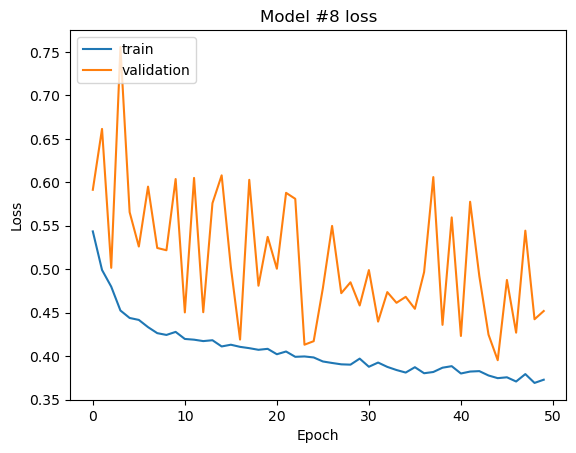

In [178]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_8.history['loss'])
plt.plot(history_8.history['val_loss'])
plt.title('Model #8 loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

63/63 [==============================] - 0s 567us/step
Best Threshold=0.353956, G-Mean=0.762


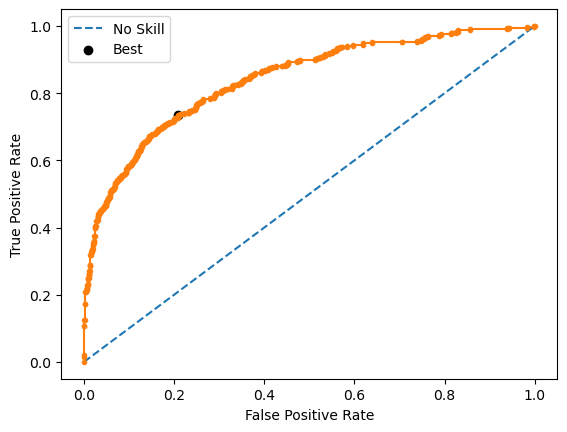

In [179]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat8 = estimator_v8.predict(X_test)
# keep probabilities for the positive outcome only
yhat8 = yhat8[:, 0]
# calculate roc curves
fpr, tpr, thresholds8 = roc_curve(y_test, yhat8)
# calculate the g-mean for each threshold
gmeans8 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans8)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds8[ix], gmeans8[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [180]:
y_pred_e8=estimator_v8.predict(X_test)
y_pred_e8 = (y_pred_e8 > thresholds8[ix])
y_pred_e8

63/63 [==============================] - 0s 546us/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [181]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm8=confusion_matrix(y_test, y_pred_e8)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = ['Not Exited','Exited']
make_confusion_matrix(cm8, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [182]:
#Accuracy as per the classification report 
from sklearn import metrics
cr8=metrics.classification_report(y_test,y_pred_e8)
print(cr8)

              precision    recall  f1-score   support

           0       0.92      0.79      0.85      1593
           1       0.47      0.73      0.57       407

    accuracy                           0.78      2000
   macro avg       0.70      0.76      0.71      2000
weighted avg       0.83      0.78      0.79      2000



**Inferences**

* The precision of Class 1 is 0.47, indicating that when the model predicts a customer will churn, there is a 47% chance the customer will actually churn. 
* The recall for Class 1 is 0.73, which means that out of all the actual churned customers, the model correctly identified 73% of them. 
* Since recall is the most important metric for Class 1, we can say that this model is slightly better than the most models we have analyzed so far. Model #4 has the highest recall score for Class 1. 
* However, there is still room for improvement as the overall accuracy of this model is only 78%.
* Based on the loss graph for Train vs Validation - The model captured lots of noise and is overfitting

## Model Performane 

**Inferences**
Model 4 - Keras Optimizer has the best Recall Score 0.79 out of the (8) models analyzed. There is still room for improvement.  

 Layer (type)                Output Shape              Param # 
 dense_5 (Dense)             (None, 256)               3072      
 dropout_3 (Dropout)         (None, 256)               0         
 dense_6 (Dense)             (None, 128)               32896     
 dropout_4 (Dropout)         (None, 128)               0         
 dense_7 (Dense)             (None, 64)                8256      
 dropout_5 (Dropout)         (None, 64)                0         
 dense_8 (Dense)             (None, 32)                2080      
 dense_9 (Dense)             (None, 1)                 33        
   
* Total params: 46,337
* Trainable params: 46,337
* Non-trainable params: 0
* {'lr': 0.01, 'batch_size': 32}
* loss = 'binary_crossentropy'

## Business Recommendations

* The dataset is primarily composed of customer data from France. However, there seems to be an inverse relationship between the proportion of churned customers and the number of customers in a given region, indicating that the bank may be facing a problem in areas with fewer clients, possibly due to inadequate customer service resources.

* Additionally, female customers have a higher likelihood of churning compared to male customers. 

* It is worth noting that a significant number of customers who churned had credit cards, although this could simply be a coincidence given that the majority of customers possess credit cards. 

* Notably, the proportion of inactive members is considerably high, which could be a cause for concern. To address this issue, the bank may need to implement a program that incentivizes inactive customers to become more active, thereby reducing customer churn.

* Cutomers with NumOfProducts == '4' has 100% (60 customers) churn percentage. The Bank may need to look into incentivising the customers who has higher NumOfProducts. 

### Dask Model

In [183]:
# importing library
from dask_ml.model_selection import GridSearchCV as DaskGridSearchCV

In [184]:
def create_model_v6(lr,batch_size):  
    np.random.seed(1337)
    model = Sequential()
    model.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
    model.add(Dropout(0.3))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32,activation='relu')) 
    model.add(Dense(1, activation='sigmoid'))

    #compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [185]:
keras_estimator = KerasClassifier(build_fn=create_model_v6, verbose=1)
# define the grid search parameters
param_grid = {
    'batch_size':[64,32, 128],
    "lr":[0.001,0.01,0.1],}

kfold_splits = 3
dask = DaskGridSearchCV(estimator=keras_estimator, 
                    cv=kfold_splits,  
                    param_grid=param_grid,n_jobs=-1)

In [186]:
import time
  
# store starting time
begin = time.time()


dask_result = dask.fit(X_train, y_train,validation_split=0.2,verbose=1) 

# Summarize results
print("Best: %f using %s" % (dask_result.best_score_, dask_result.best_params_))
means = dask_result.cv_results_['mean_test_score']
stds = dask_result.cv_results_['std_test_score']
params = dask_result.cv_results_['params']

time.sleep(1)
# store end time
end = time.time()
  
# total time taken
print(f"Total runtime of the program is {end - begin}")

200/200 [==============================] - 1s 2ms/step - loss: 0.4541 - accuracy: 0.8006 - val_loss: 0.4373 - val_accuracy: 0.8125
Best: 0.809375 using {'batch_size': 32, 'lr': 0.01}
Total runtime of the program is 18.762488842010498


**Not progressing with the dask Model as this as higher run time compared to the other models**. 

## END OF NOTEBOOK